In [1]:
# from pytorch_tabnet.tab_model import TabNetClassifier
# from tabnet import TabNetClassifier
# from time import time
# from IPython.display import clear_output
# from sklearn.model_selection import cross_validate
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import openpyxl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay,roc_curve,recall_score,precision_score,confusion_matrix,accuracy_score,mean_squared_error,explained_variance_score,f1_score,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,RobustScaler,PolynomialFeatures
# import random
from sklearn.model_selection import train_test_split,KFold
import glob
from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA,FastICA,FactorAnalysis
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2,f_oneway,f_classif
# from sklearn.model_selection import GridSearchCV
# from sklearn.utils.class_weight import compute_class_weight
# import keras
# import mat4py
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras import regularizers
# from sklearn.utils.class_weight import compute_class_weight
# import keras
# from tensorflow.keras import initializers
# from sklearn.svm import SVC
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:

# one time run
whole_data = []
for add in glob.glob("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/modified_result/*.csv"):
    flavor = pd.read_csv(add)
    
    flavor.sort_values("Unnamed: 0",axis=0,inplace= True)
    flavor.drop("Unnamed: 0",axis=1,inplace=True)
    whole_data.append(flavor.iloc[:408,:])

# Low stds are dropped
for i in range(len(whole_data)):
    stds = pd.DataFrame(np.std(whole_data[i]))
    whole_data[i].drop(stds[stds[0]<0.01].index,axis=1,inplace=True)





In [ ]:
whole_data[0]

,0,1,2,3,4,5,6,7,8,9,...,15670,15671,15672,15673,15674,15675,15676,15677,15678,15679
0,-0.038812,-0.102688,0.068627,0.067520,-0.042237,-0.108859,0.068406,0.068216,-0.042162,-0.108841,...,0.044172,0.078362,-0.016963,-0.122564,0.044501,0.078484,-0.007032,-0.095227,0.050219,0.073302
1,-0.038700,-0.102803,0.070787,0.064708,-0.042194,-0.109063,0.069853,0.067308,-0.042188,-0.109044,...,0.045959,0.077897,-0.017016,-0.122942,0.046574,0.077907,-0.006913,-0.095392,0.051541,0.072809
2,-0.038432,-0.102883,0.071189,0.065738,-0.042356,-0.108703,0.068265,0.069701,-0.042395,-0.108644,...,0.046244,0.083256,-0.016006,-0.120569,0.015052,0.091791,-0.006914,-0.095137,0.045769,0.073081
3,-0.038724,-0.102597,0.073692,0.051733,-0.042272,-0.108423,0.049460,0.094154,-0.042280,-0.108793,...,0.043894,0.079514,-0.016862,-0.122594,0.042745,0.078838,-0.006819,-0.095107,0.049076,0.073486
4,-0.038316,-0.102894,0.071329,0.064597,-0.042259,-0.109121,0.070653,0.065513,-0.042227,-0.109067,...,0.048121,0.077219,-0.017029,-0.122929,0.049415,0.077614,-0.006853,-0.095264,0.052376,0.072868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-0.215508,0.018110,-0.168398,0.340874,-0.211638,-0.000278,-0.246909,0.297292,-0.211635,-0.000308,...,-0.290331,-0.023523,-0.165039,0.053877,-0.275645,-0.027927,-0.098893,0.001654,-0.269676,0.142598
404,-0.039667,-0.101800,0.059973,0.080259,-0.043397,-0.106304,0.057036,0.084161,-0.043178,-0.106763,...,-0.039881,-0.003827,-0.017399,-0.122193,0.042675,0.079117,-0.007100,-0.095267,0.048880,0.073787
405,-0.040076,-0.101487,0.057881,0.081212,-0.043894,-0.106027,0.054709,0.084784,-0.043713,-0.106001,...,-0.189964,-0.063371,-0.017188,-0.119165,0.042960,0.079529,-0.007049,-0.095053,0.049287,0.075407
406,-0.038356,-0.102902,0.071023,0.066438,-0.042269,-0.108841,0.068772,0.069028,-0.042292,-0.108841,...,0.054483,0.075843,-0.017063,-0.123944,0.054511,0.075317,-0.007143,-0.095899,0.058808,0.071249


In [3]:
# 99% variance pca and stack all flavors
deep_features = pd.DataFrame()
pca = PCA(0.99)
for df in whole_data:
    deep_features = pd.concat([deep_features,pd.DataFrame(pca.fit_transform(df))],axis=1)

deep_features.columns = range(deep_features.shape[1])

deep_features.to_csv("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/deep_features_pca_stacked.csv",header=False,index=False)

In [4]:
all_labels = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/Outcome_Data_HN_V06.xlsx")["Progression"]

In [5]:
# l_test = []
# l_train = []
# names = []
# count = 0
# iters = list(range(5,200,10))
# for l1 in iters:
#     for l2 in iters:
#         count+=1
#         model = MLPClassifier((l1,l2),early_stopping=True,validation_fraction=0.2)
#         d = cross_validate(model,data,all_labels,return_train_score=True)
#         l_test.append(np.mean(d["test_score"]))
#         l_train.append(np.mean(d["train_score"]))
#         names.append(count)

# plt.plot(names,l_test)
# plt.plot(names,l_train)

In [6]:
# plt.savefig("plot.jpg")

In [7]:
deep_features

,0,1,2,3,4,5,6,7,8,9,...,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918
0,1.136222,-5.401064,-6.008072,-3.034554,1.147777,2.494790,-4.034720,6.301441,3.565676,1.075978,...,-0.363466,-0.196868,0.133411,-0.381394,0.209438,0.237030,0.317025,0.023054,0.263038,-0.117019
1,-5.869138,10.086907,-14.661766,-2.407847,-4.203308,-0.756402,1.031980,5.145412,-0.315011,0.680853,...,-0.223436,-0.140606,0.243034,0.150044,-0.046643,-0.137685,0.017165,0.021794,-0.207300,0.319180
2,-19.398418,9.161678,-9.916618,8.397658,-0.485958,-1.741838,-2.344350,-4.724054,2.238928,-0.931872,...,0.009762,0.053635,-0.440669,-0.179096,0.580102,-0.308451,0.043462,0.271780,0.046914,-0.289070
3,-15.646887,22.245214,-10.094926,-5.807894,-6.942022,-3.536983,10.573700,1.971997,-3.815720,-2.348208,...,-0.259005,-0.086171,-0.286317,-0.001024,0.433847,0.323214,0.033735,0.306015,-0.074139,0.369686
4,-11.618258,1.525768,-11.269125,1.674336,-3.491879,-2.512120,-2.363516,0.017903,-1.279440,-1.667297,...,0.324939,-0.332156,0.319508,0.470778,-0.755243,0.100724,0.063977,0.217058,0.011689,-0.300908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-1.119524,-13.242278,0.404512,-1.033081,-0.232985,-1.573982,1.323565,1.230686,0.359092,-1.567773,...,-0.003345,0.038907,0.325238,0.291901,-0.055030,0.039764,0.014062,-0.265644,-0.015214,0.025756
404,9.117678,-3.749002,-0.170386,-1.039007,5.213619,-4.637366,-0.234928,0.366488,-0.355003,-1.644347,...,-0.090785,0.262801,-0.245772,0.490503,-0.529763,0.070948,-0.446036,-0.317913,0.062731,-0.755756
405,7.913360,-6.466521,0.807321,-1.182175,4.732484,-4.702421,0.707234,0.321090,-0.256107,-2.316899,...,-0.083829,0.126009,0.051187,-0.023609,0.001410,0.001291,0.084496,0.161396,0.171304,0.109439
406,11.860682,-0.366687,2.091281,-1.960098,-4.427883,5.833802,-5.464338,-2.129413,0.531019,-4.680171,...,-0.302000,0.237176,0.186842,0.310224,-0.026311,-0.538414,0.417507,-0.113688,-0.242185,0.153893


In [8]:
deep_features = pd.read_csv("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/deep_features_pca_stacked.csv",header=None)

In [9]:
all_labels = pd.read_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/Outcome_Data_HN_V06.xlsx")["Progression"]

In [ ]:
deep_features

,0,1,2,3,4,5,6,7,8,9,...,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918
0,0.107583,7.425632,-9.367006,7.125009,-7.960252,-4.664871,-0.042266,1.648029,-3.639079,-0.768479,...,0.230497,-0.350974,-0.021939,-0.102468,-0.184175,0.184324,0.189902,-0.346620,0.106880,-0.346766
1,0.399553,10.840274,-9.639409,5.646807,-5.623012,-5.636859,-0.683149,1.515392,-3.414042,-1.274310,...,-0.066831,-0.252301,0.043782,-0.020022,-0.086701,-0.373512,0.192269,0.239861,0.163748,-0.249075
2,-11.978349,1.057783,-5.644924,-1.868119,-0.380978,4.747566,-0.077002,3.341278,-1.505592,1.140147,...,0.059026,-0.116184,-0.484369,-0.284789,-0.137245,-0.005062,-0.211253,0.208983,-0.054079,-0.157081
3,-2.045024,6.300500,-9.812500,1.906813,1.138107,-3.962615,-1.809154,2.889808,-1.115185,-3.015593,...,0.246933,0.066909,0.096461,-0.044182,0.197177,0.077478,-0.127807,-0.136037,-0.038396,-0.180787
4,-6.818208,3.271444,-9.661689,0.993333,-6.010099,0.861071,0.796504,1.432546,-4.816777,-2.336700,...,-0.454326,0.018774,0.847279,-0.234569,0.236324,-0.357639,0.170543,-0.166976,0.169705,-0.159752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0.882548,1.908581,12.188863,8.209162,-2.683608,-6.782961,7.879523,3.570526,-3.414354,3.488200,...,0.337715,0.020490,-0.094994,-0.025336,-0.023315,-0.105410,-0.099226,-0.222540,-0.050427,0.353831
404,28.560284,18.167778,12.267575,-10.071487,-8.486026,2.940641,6.123778,-4.014361,-2.079929,1.368259,...,0.448176,-0.128554,-0.213498,0.213374,-0.081752,-0.025493,0.037274,0.072300,0.254706,0.092576
405,31.217608,17.441852,14.803731,-9.685646,-9.575403,5.556466,4.040509,-2.819323,-1.378563,0.585035,...,-0.208226,0.698213,-0.163451,0.284477,0.029634,0.541717,-0.089803,0.138335,0.181417,0.635710
406,11.587239,-11.619829,-7.763899,0.678762,0.647791,1.873873,4.250558,-3.353131,-2.016608,-3.194266,...,0.427484,0.487308,0.022325,-0.215534,0.020436,-0.146254,-0.612534,-0.095593,-0.357637,0.318753


In [10]:
s = SelectKBest()
s.fit(deep_features,all_labels)
ranking1 =[p for p in enumerate(s.scores_)]
ranking1.sort(reverse = True,key = lambda p: p[1])
ranking1 = [p[0] for p in ranking1]

In [11]:
n_features_results = {}
for k in range(10,2000,100):

    n_features_results[k] = {}
    index = ranking1[:k]
    data = deep_features[index]


    n = 9
    # n = eval(input("n_estimators"))
    kf = KFold(n_splits=5,shuffle=True)

    count = 0
    lst_test = []
    lst_val = []
    lst_test_prob = []
    lst_val_prob = []
    # Iterating through each fold
    for train,test  in kf.split(data,all_labels):
        preds_test = pd.DataFrame()
        pred_val = pd.DataFrame()

        count+=1

        X = data.iloc[train]
        y = all_labels.iloc[train]
        X_test = data.iloc[test]
        y_test = all_labels.iloc[test] 
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
        pred_val_prob = np.zeros((len(y_validation),2),dtype=np.float32)
        pred_test_prob = np.zeros((y_test.shape[0],2),dtype=np.float32)
        for i in range(n):

        #     # Create model
            # model_knn = DecisionTreeClassifier()
            # model_knn = MLPClassifier((200,10),max_iter=200,early_stopping=True,solver="adam",learning_rate  = "adaptive",validation_fraction=0.2,n_iter_no_change=15)
            model_knn = MLPClassifier((5,),early_stopping=False,max_iter=10000)
        #     # train model with training data
            model_knn.fit(X_train,y_train)

        #     # evaluating model with validation data
            pred_val = pd.concat([pred_val,(pd.DataFrame(data={"Knn" : model_knn.predict(X_validation)}))],axis=1)
            y_pred_val_prob= model_knn.predict_proba(X_validation)
            pred_val_prob+= y_pred_val_prob


            model_knn = MLPClassifier((5,),early_stopping=False,max_iter=10000)
            # model_knn = DecisionTreeClassifier()
            model_knn.fit(X,y)

            preds_test = pd.concat([preds_test,(pd.DataFrame(model_knn.predict(X_test)))],axis=1)


            y_pred_test_prob= model_knn.predict_proba(X_test)
            pred_test_prob +=y_pred_test_prob
            # print(accuracy_score(y_test,preds_test))


        preds_test["sum"]= preds_test.transpose().apply(sum)

        preds_test["ensemble"] = preds_test["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

        pred_val["sum"]= pred_val.transpose().apply(sum)

        pred_val["ensemble"] = pred_val["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

        acc_test = accuracy_score(y_test,preds_test["ensemble"].to_numpy())
        acc_val = accuracy_score(y_validation,pred_val["ensemble"].to_numpy())

        lst_test.append(acc_test)
        lst_val.append(acc_val)

        pred_val_prob /=n
        pred_test_prob/=n
        # pred_val_prob.argmax(axis=-1)
        # pred_test_prob.argmax(axis=-1)
        p1 = [0 if n > 0.5 else 1 for n in pred_test_prob[:,0] ]
        p2 = [0 if n > 0.5 else 1 for n in pred_val_prob[:,0] ]

        # acc_test_prob = accuracy_score(y_test,pred_test_prob.argmax(axis=-1))
        # acc_val_prob = accuracy_score(y_validation,pred_val_prob.argmax(axis=-1))
        acc_test_prob = accuracy_score(y_test,p1)
        acc_val_prob = accuracy_score(y_validation,p2)

        lst_test_prob.append(acc_test_prob)
        lst_val_prob.append(acc_val_prob)
    n_features_results[k]["TR"] = lst_test
    n_features_results[k]["VR"] = lst_val
    n_features_results[k]["TRp"] = lst_test_prob
    n_features_results[k]["VRp"] = lst_val_prob
    print(k)


10
110
210
310
410
510
610
710
810
910
1010
1110
1210
1310
1410
1510
1610
1710
1810
1910


In [12]:

import json
Json = json.dumps(n_features_results)

# open file for writing, "w" 
f = open("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/n_features_selection_2nd_try.json","w")

# write json object to file
f.write(Json)

# close file
f.close()

In [13]:
average_v_results = []
for key in n_features_results.keys():
  average_v_results.append(np.mean(n_features_results[key]["VR"]))

In [14]:
z = zip(average_v_results,n_features_results.keys())
z_lst = [i for i in z]


In [15]:
best_number_features = max(z_lst,key = lambda x:x[0])[1] # Number of features with max validation accuracy

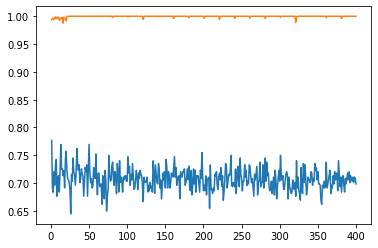

In [ ]:
# l_test = []
# l_train = []
# names = []
# count = 0
# iters = list(range(5,200,10))
# for l1 in iters:
#     for l2 in iters:
#         count+=1
#         model = MLPClassifier((l1,l2),early_stopping=False,validation_fraction=0.2,max_iter=3000)
#         d = cross_validate(model,data,all_labels,return_train_score=True)
#         l_test.append(np.mean(d["test_score"]))
#         l_train.append(np.mean(d["train_score"]))
#         names.append(count)

# plt.plot(names,l_test)
# plt.plot(names,l_train)

In [16]:
index = ranking1[:best_number_features]
data = deep_features[index]

results = {}
for n in range(1,13,2):
    
    results[n] = {}
    for l1 in range(5,201,50):
        kf = KFold(n_splits=5,shuffle=True)
        results[n][l1] ={}
        count = 0
        lst_test = []
        lst_val = []
        lst_test_prob = []
        lst_val_prob = []
        # Iterating through each fold
        for train,test  in kf.split(data,all_labels):
            preds_test = pd.DataFrame()
            pred_val = pd.DataFrame()

            count+=1

            X = data.iloc[train]
            y = all_labels.iloc[train]
            X_test = data.iloc[test]
            y_test = all_labels.iloc[test] 
            X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
            pred_val_prob = np.zeros((len(y_validation),2),dtype=np.float32)
            pred_test_prob = np.zeros((y_test.shape[0],2),dtype=np.float32)
            for i in range(n):

            #     # Create model
                # model_knn = DecisionTreeClassifier()
                # model_knn = MLPClassifier((200,10),max_iter=200,early_stopping=True,solver="adam",learning_rate  = "adaptive",validation_fraction=0.2,n_iter_no_change=15)
                model_knn = MLPClassifier((l1,),early_stopping=False,max_iter=10000)
            #     # train model with training data
                model_knn.fit(X_train,y_train)

            #     # evaluating model with validation data
                pred_val = pd.concat([pred_val,(pd.DataFrame(data={"Knn" : model_knn.predict(X_validation)}))],axis=1)
                y_pred_val_prob= model_knn.predict_proba(X_validation)
                pred_val_prob+= y_pred_val_prob


                model_knn = MLPClassifier((l1,),early_stopping=False,max_iter=10000)
                # model_knn = DecisionTreeClassifier()
                model_knn.fit(X,y)

                preds_test = pd.concat([preds_test,(pd.DataFrame(model_knn.predict(X_test)))],axis=1)


                y_pred_test_prob= model_knn.predict_proba(X_test)
                pred_test_prob +=y_pred_test_prob
                # print(accuracy_score(y_test,preds_test))


            preds_test["sum"]= preds_test.transpose().apply(sum)

            preds_test["ensemble"] = preds_test["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

            pred_val["sum"]= pred_val.transpose().apply(sum)

            pred_val["ensemble"] = pred_val["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

            acc_test = accuracy_score(y_test,preds_test["ensemble"].to_numpy())
            acc_val = accuracy_score(y_validation,pred_val["ensemble"].to_numpy())

            lst_test.append(acc_test)
            lst_val.append(acc_val)

            pred_val_prob /=n
            pred_test_prob/=n
            # pred_val_prob.argmax(axis=-1)
            # pred_test_prob.argmax(axis=-1)
            p1 = [0 if n > 0.5 else 1 for n in pred_test_prob[:,0] ]
            p2 = [0 if n > 0.5 else 1 for n in pred_val_prob[:,0] ]

            # acc_test_prob = accuracy_score(y_test,pred_test_prob.argmax(axis=-1))
            # acc_val_prob = accuracy_score(y_validation,pred_val_prob.argmax(axis=-1))
            acc_test_prob = accuracy_score(y_test,p1)
            acc_val_prob = accuracy_score(y_validation,p2)

            lst_test_prob.append(acc_test_prob)
            lst_val_prob.append(acc_val_prob)
            results[n][l1]["Test Results"] = lst_test
            results[n][l1]["Test Results_on prob"] = lst_test_prob
            results[n][l1]["Validation Results"] = lst_val
            results[n][l1]["Validation Results_on prob"] = lst_val_prob



In [17]:
lst_neurons_estimators_vr = []
for key1 in results.keys():
  for key2 in results[key1].keys():
    lst_neurons_estimators_vr.append((key1,key2,np.mean(results[key1][key2]["Validation Results"])))


In [18]:
max(lst_neurons_estimators_vr,key = lambda x : x[2])

(3, 155, 0.8696969696969697)

In [ ]:
# results[1][5].keys()

dict_keys(['Test Results', 'Test Results_on prob', 'Validation Results', 'Validation Results_on prob'])

In [ ]:
# df = pd.DataFrame()
# for n in range(1,13,2):
#     for l1 in range(5,201,10):
#         df = pd.concat([df,pd.DataFrame(data = {"Result mode": "Test Results",
#                                                 "Number of estimators":[n],
#                                                 "number of neurons in layer":[l1],
#                                                "fold1": results[n][l1]['Test Results'][0],
#                                                "fold2": results[n][l1]['Test Results'][1],
#                                                "fold3": results[n][l1]['Test Results'][2],
#                                                "fold4": results[n][l1]['Test Results'][3],
#                                                "fold5": results[n][l1]['Test Results'][4],
#                                                "Average": np.mean(results[n][l1]['Test Results']),
#                                                "Standard Deviation": np.std(results[n][l1]['Test Results'])})],axis=0)
#         df = pd.concat([df,pd.DataFrame(data = {"Result mode": "Test Results on probability",
#                                                 "Number of estimators":[n],
#                                                 "number of neurons in layer":[l1],
#                                                "fold1": results[n][l1]['Test Results_on prob'][0],
#                                                "fold2": results[n][l1]['Test Results_on prob'][1],
#                                                "fold3": results[n][l1]['Test Results_on prob'][2],
#                                                "fold4": results[n][l1]['Test Results_on prob'][3],
#                                                "fold5": results[n][l1]['Test Results_on prob'][4],
#                                                "Average": np.mean(results[n][l1]['Test Results_on prob']),
#                                                "Standard Deviation": np.std(results[n][l1]['Test Results_on prob'])})],axis=0)
#         df = pd.concat([df,pd.DataFrame(data = {"Result mode": "Validation Results",
#                                                 "Number of estimators":[n],
#                                                 "number of neurons in layer":[l1],
#                                                "fold1": results[n][l1]['Validation Results'][0],
#                                                "fold2": results[n][l1]['Validation Results'][1],
#                                                "fold3": results[n][l1]['Validation Results'][2],
#                                                "fold4": results[n][l1]['Validation Results'][3],
#                                                "fold5": results[n][l1]['Validation Results'][4],
#                                                "Average": np.mean(results[n][l1]['Validation Results']),
#                                                "Standard Deviation": np.std(results[n][l1]['Validation Results'])})],axis=0)

        
#         df = pd.concat([df,pd.DataFrame(data = {"Result mode": "Validation Results on probability",
#                                                 "Number of estimators":[n],
#                                                 "number of neurons in layer":[l1],
#                                                "fold1": results[n][l1]['Validation Results_on prob'][0],
#                                                "fold2": results[n][l1]['Validation Results_on prob'][1],
#                                                "fold3": results[n][l1]['Validation Results_on prob'][2],
#                                                "fold4": results[n][l1]['Validation Results_on prob'][3],
#                                                "fold5": results[n][l1]['Validation Results_on prob'][4],
#                                                "Average": np.mean(results[n][l1]['Validation Results_on prob']),
#                                                "Standard Deviation": np.std(results[n][l1]['Validation Results_on prob'])})],axis=0)
                                                

In [ ]:
# df.to_excel("ensemble voting results.xlsx",index=False)

In [ ]:
# for mode in ['Test Results','Test Results_on prob','Validation Results','Validation Results_on prob']:


In [ ]:
# import matplotlib.pyplot as plt

In [ ]:
# for n in range(1,13,2):
#     results_for_n_estimators = []
#     for l1 in range(5,201,10):
#         results_for_n_estimators.append(np.mean(results[n][l1]['Validation Results'])
#         plt.plot(range(5,201,10),results_for_n_estimators)
                                        
        
    
            
                                        
                
                                    

SyntaxError: invalid syntax (12776091.py, line 5)

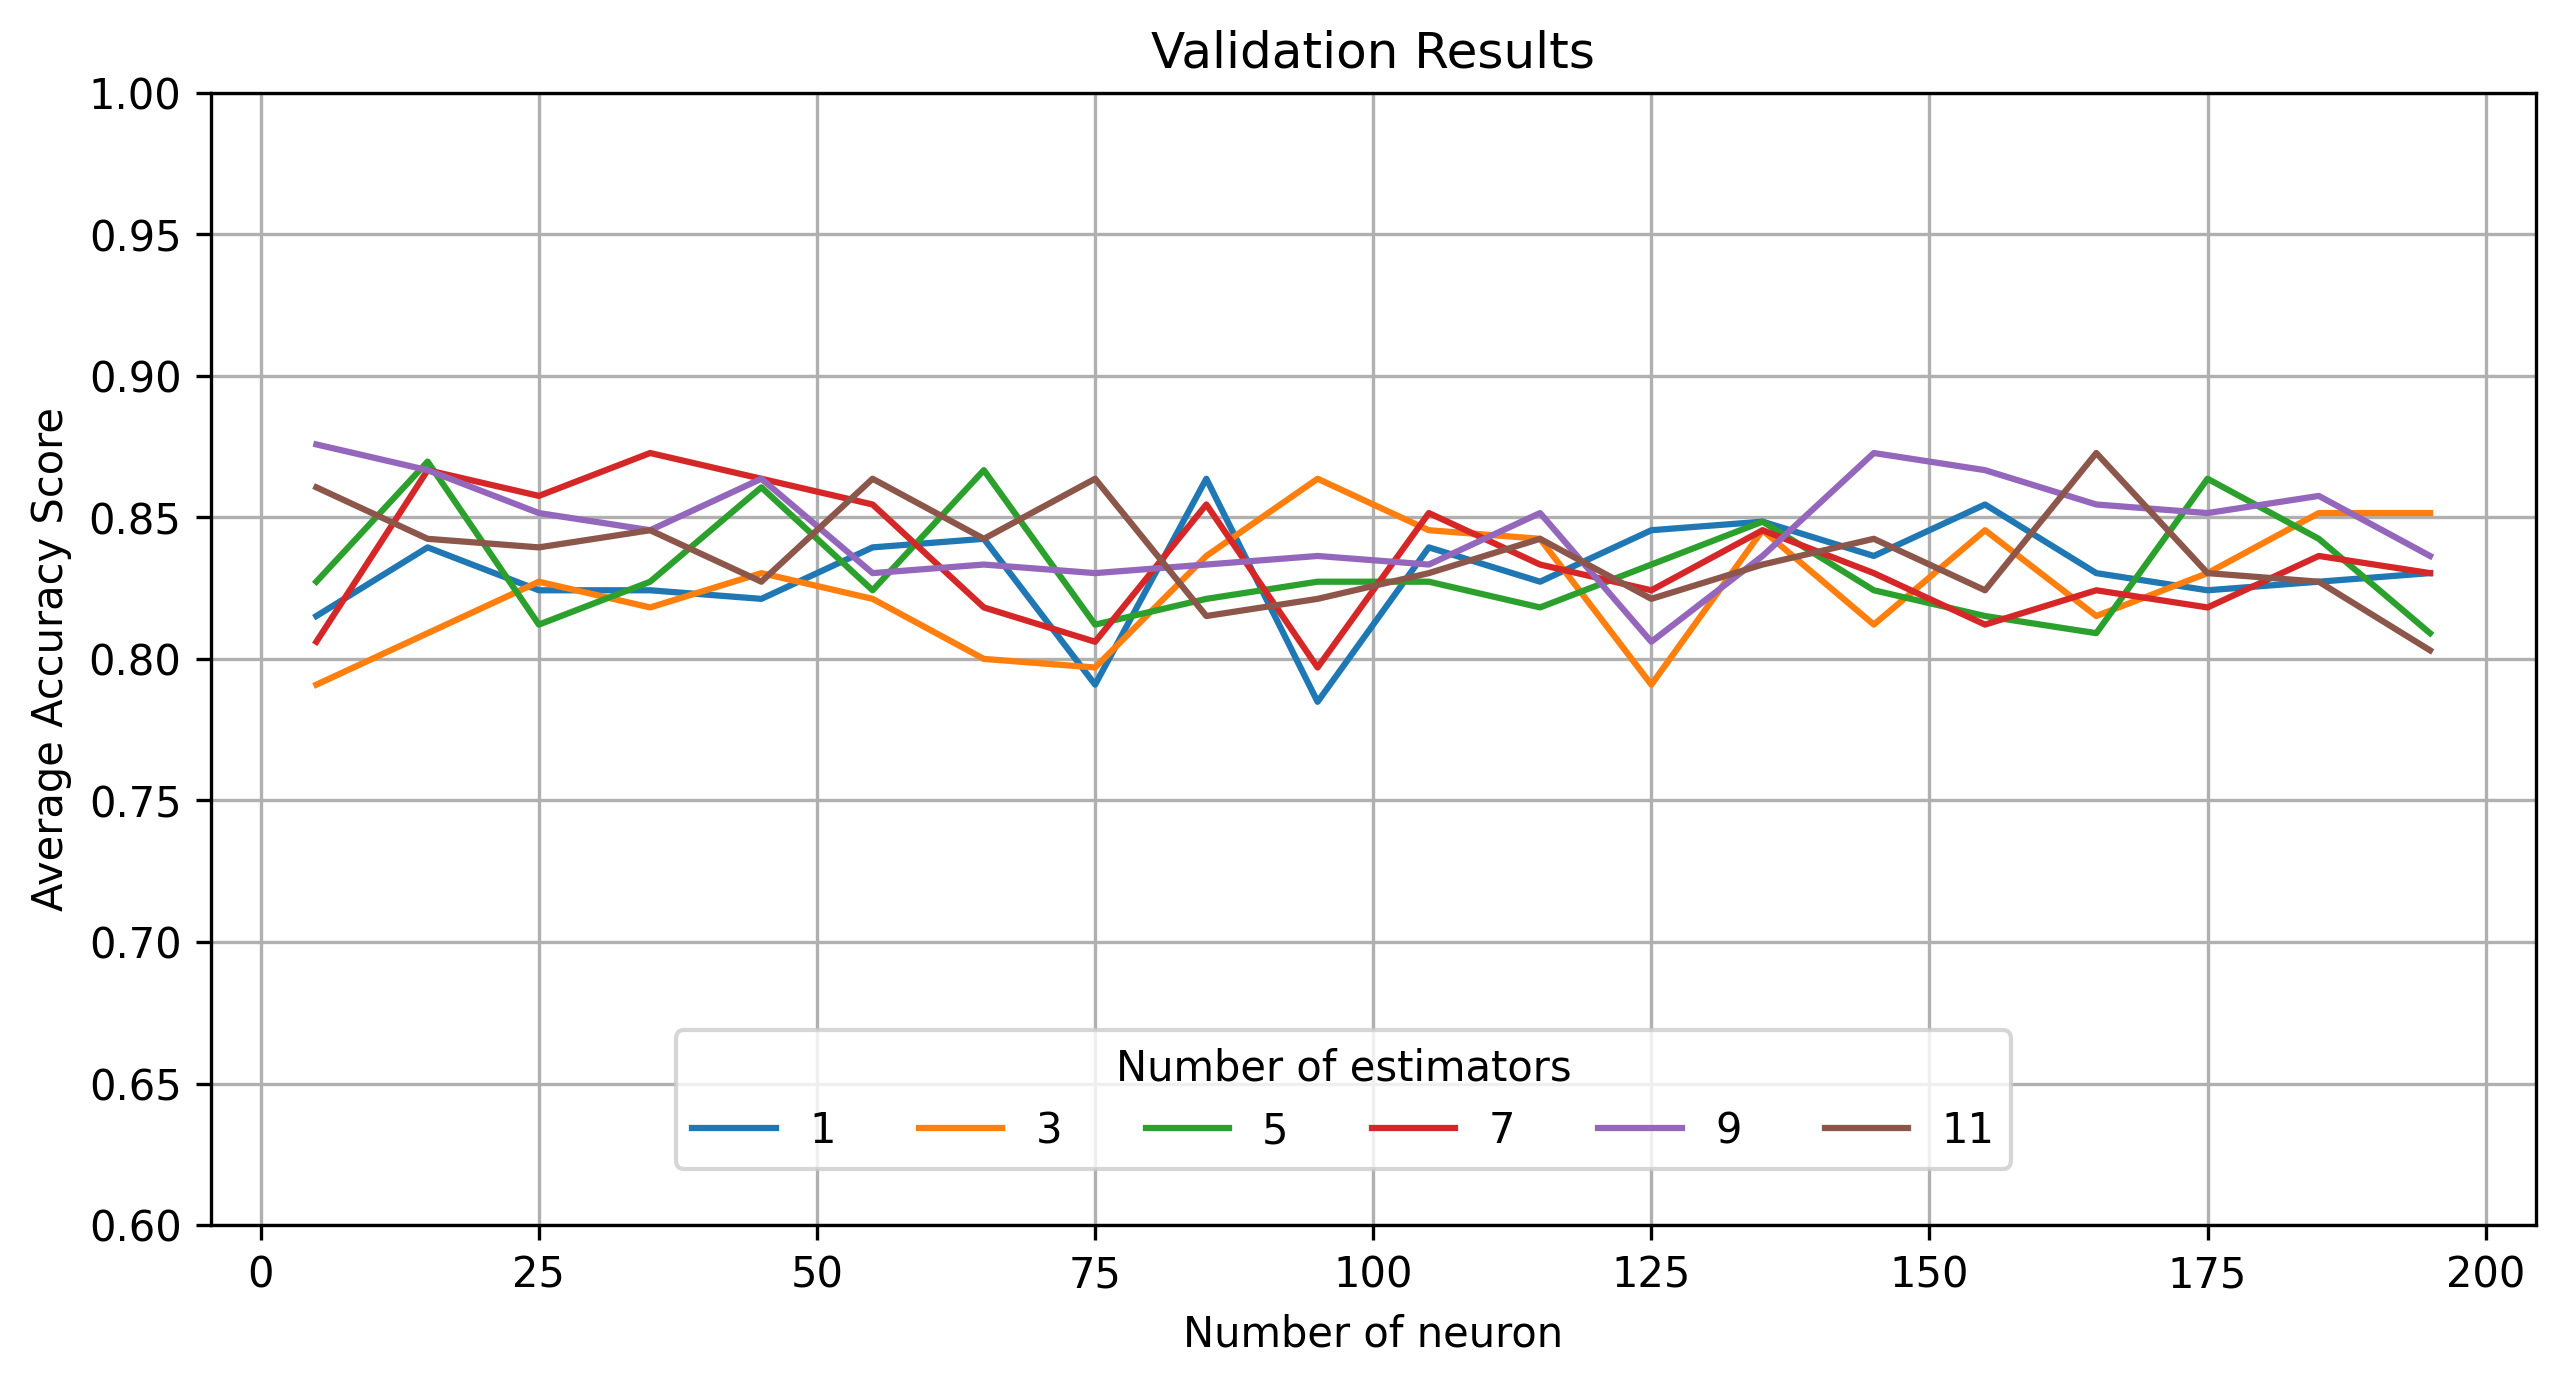

In [ ]:
# plt.figure(figsize=(10,5),dpi = 300)

# plt.ylim(bottom=0.6)
# plt.title("Validation Results")
# plt.ylabel("Average Accuracy Score")
# plt.xlabel("Number of neuron")
# plt.grid()
# for n in range(1,13,2):
#     results_for_n_estimators = []
#     for l1 in range(5,201,10):
#         results_for_n_estimators.append(np.mean(results[n][l1]['Validation Results']))
#     plt.plot(range(5,201,10),results_for_n_estimators,label = n)
    
    
    
# plt.legend(ncol= 6,loc = (0.2,0.05),title = "Number of estimators")
# plt.savefig("Validation Results.jpg",bbox_inches = "tight")

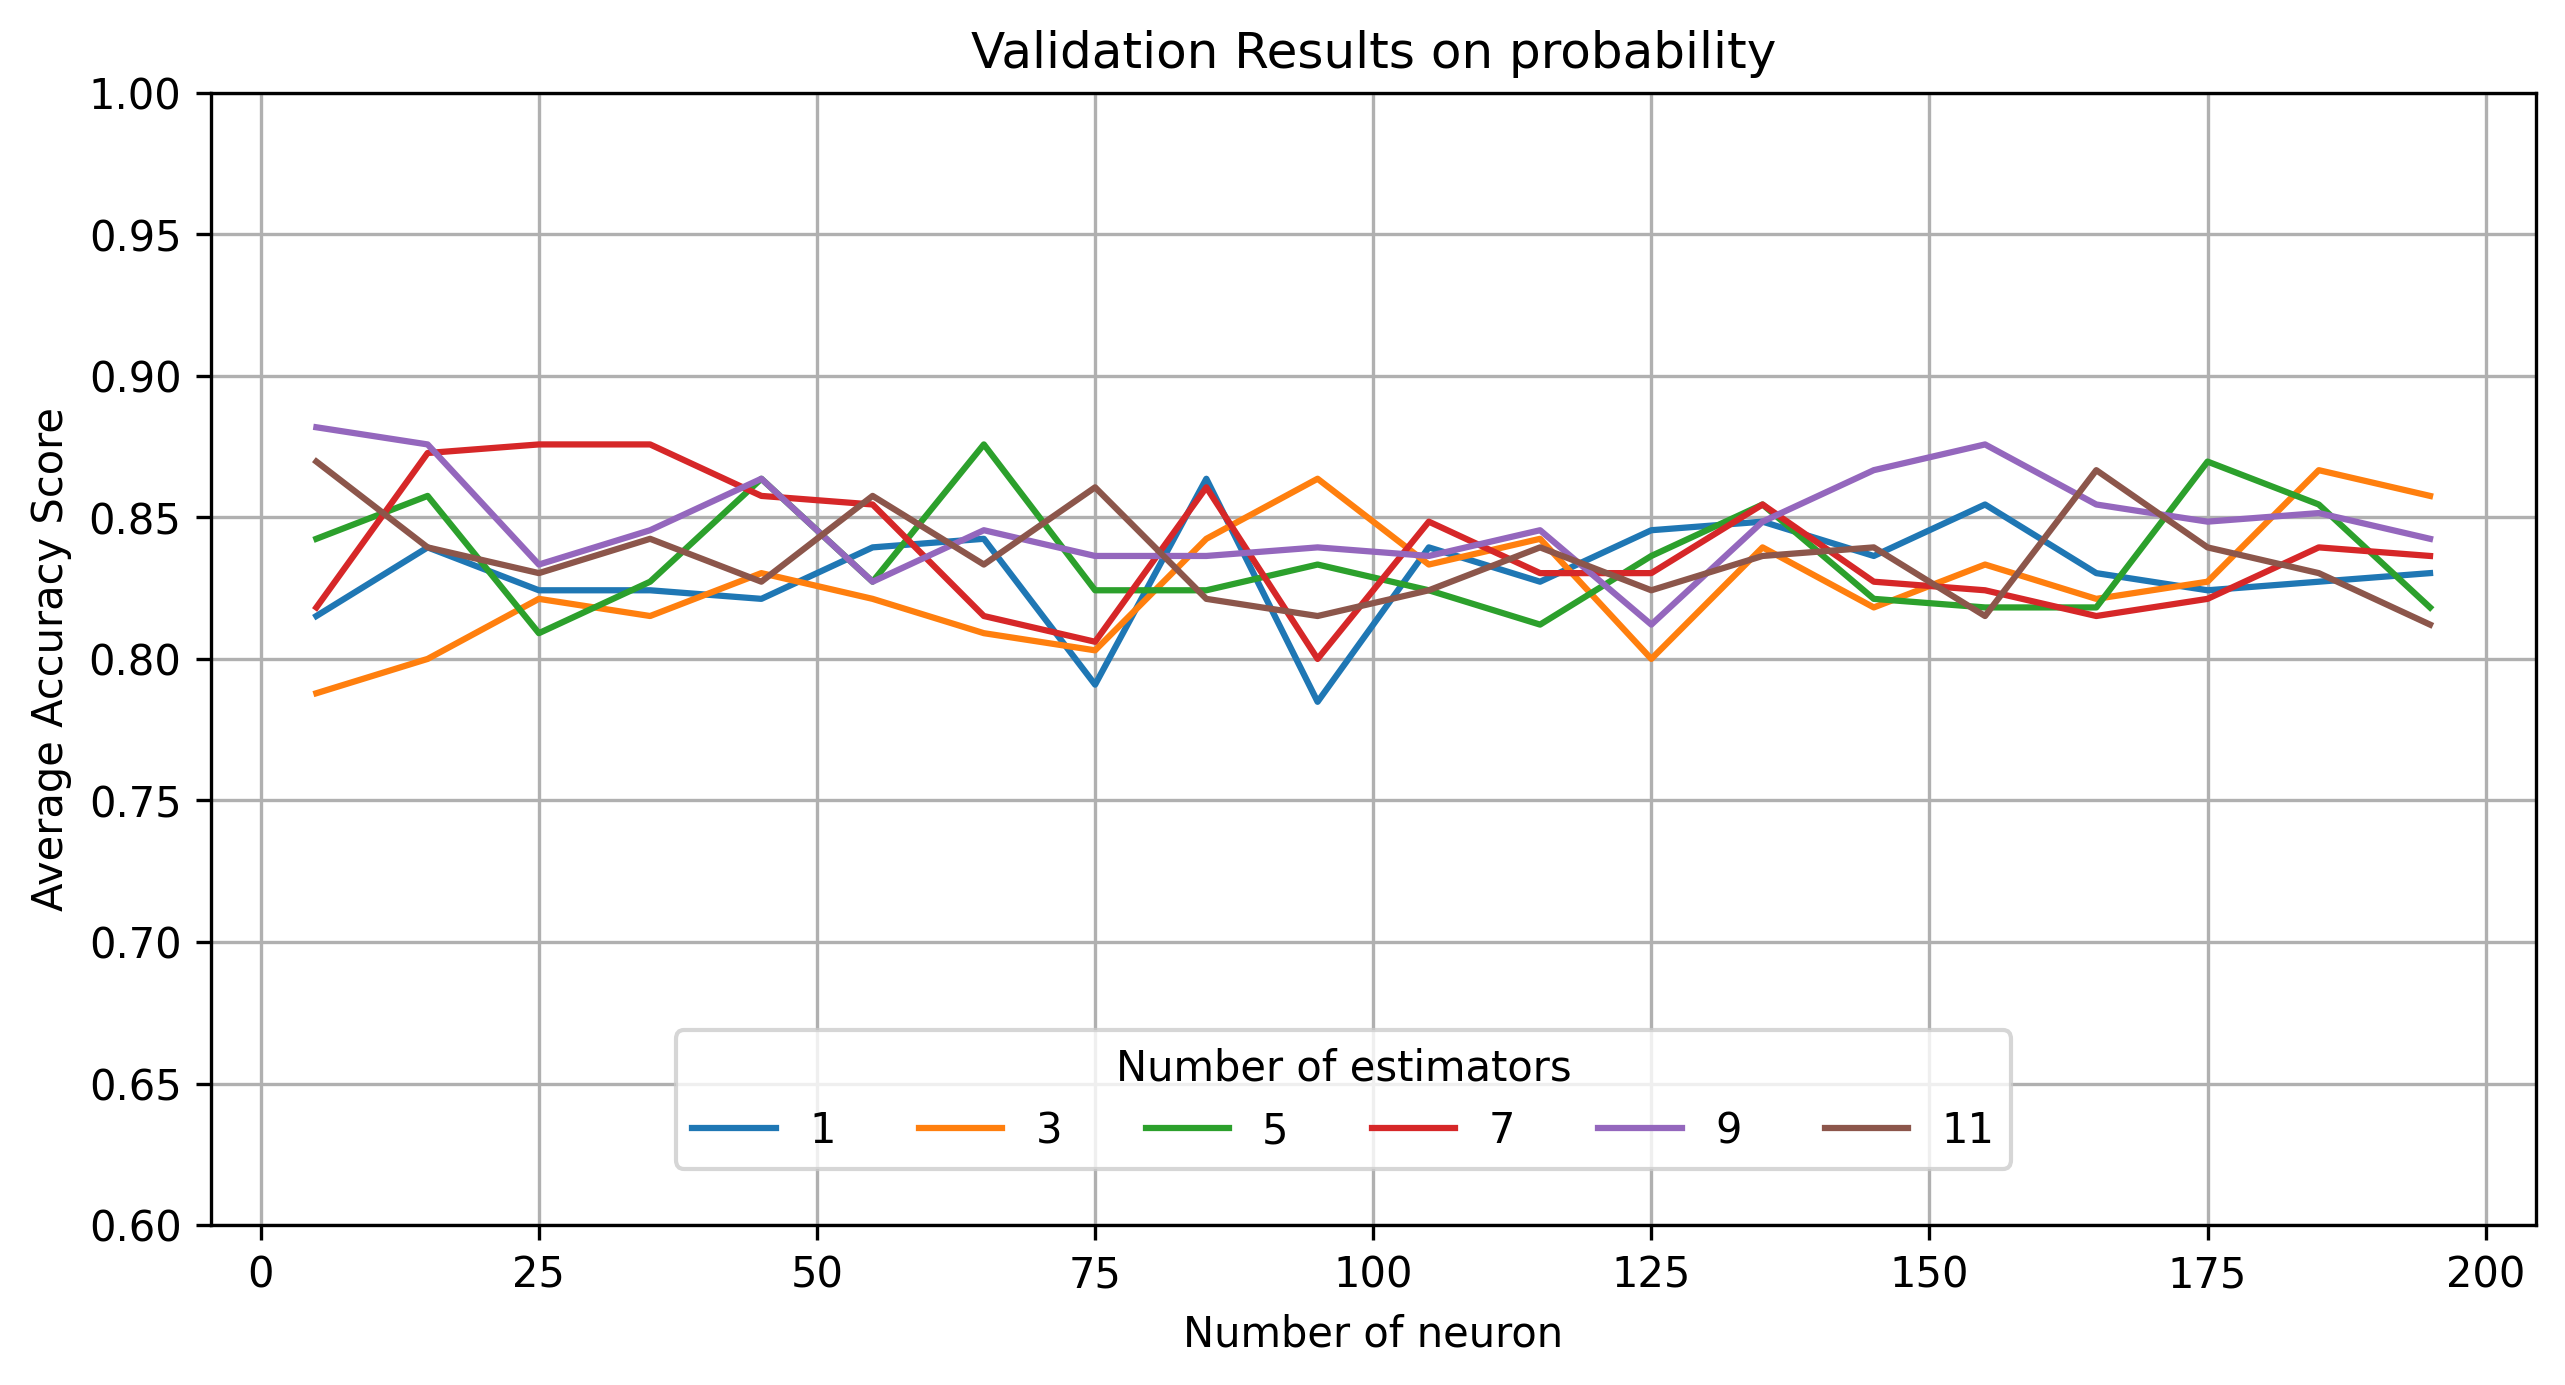

In [ ]:
# plt.figure(figsize=(10,5),dpi = 300)

# plt.ylim(bottom=0.6)
# plt.title("Validation Results on probability")
# plt.ylabel("Average Accuracy Score")
# plt.xlabel("Number of neuron")
# plt.grid()
# for n in range(1,13,2):
#     results_for_n_estimators = []
#     for l1 in range(5,201,10):
#         results_for_n_estimators.append(np.mean(results[n][l1]['Validation Results_on prob']))
#     plt.plot(range(5,201,10),results_for_n_estimators,label = n)
    
    
    
# plt.legend(ncol= 6,loc = (0.2,0.05),title = "Number of estimators")
# plt.savefig("Validation Results_on prob.jpg",bbox_inches = "tight")

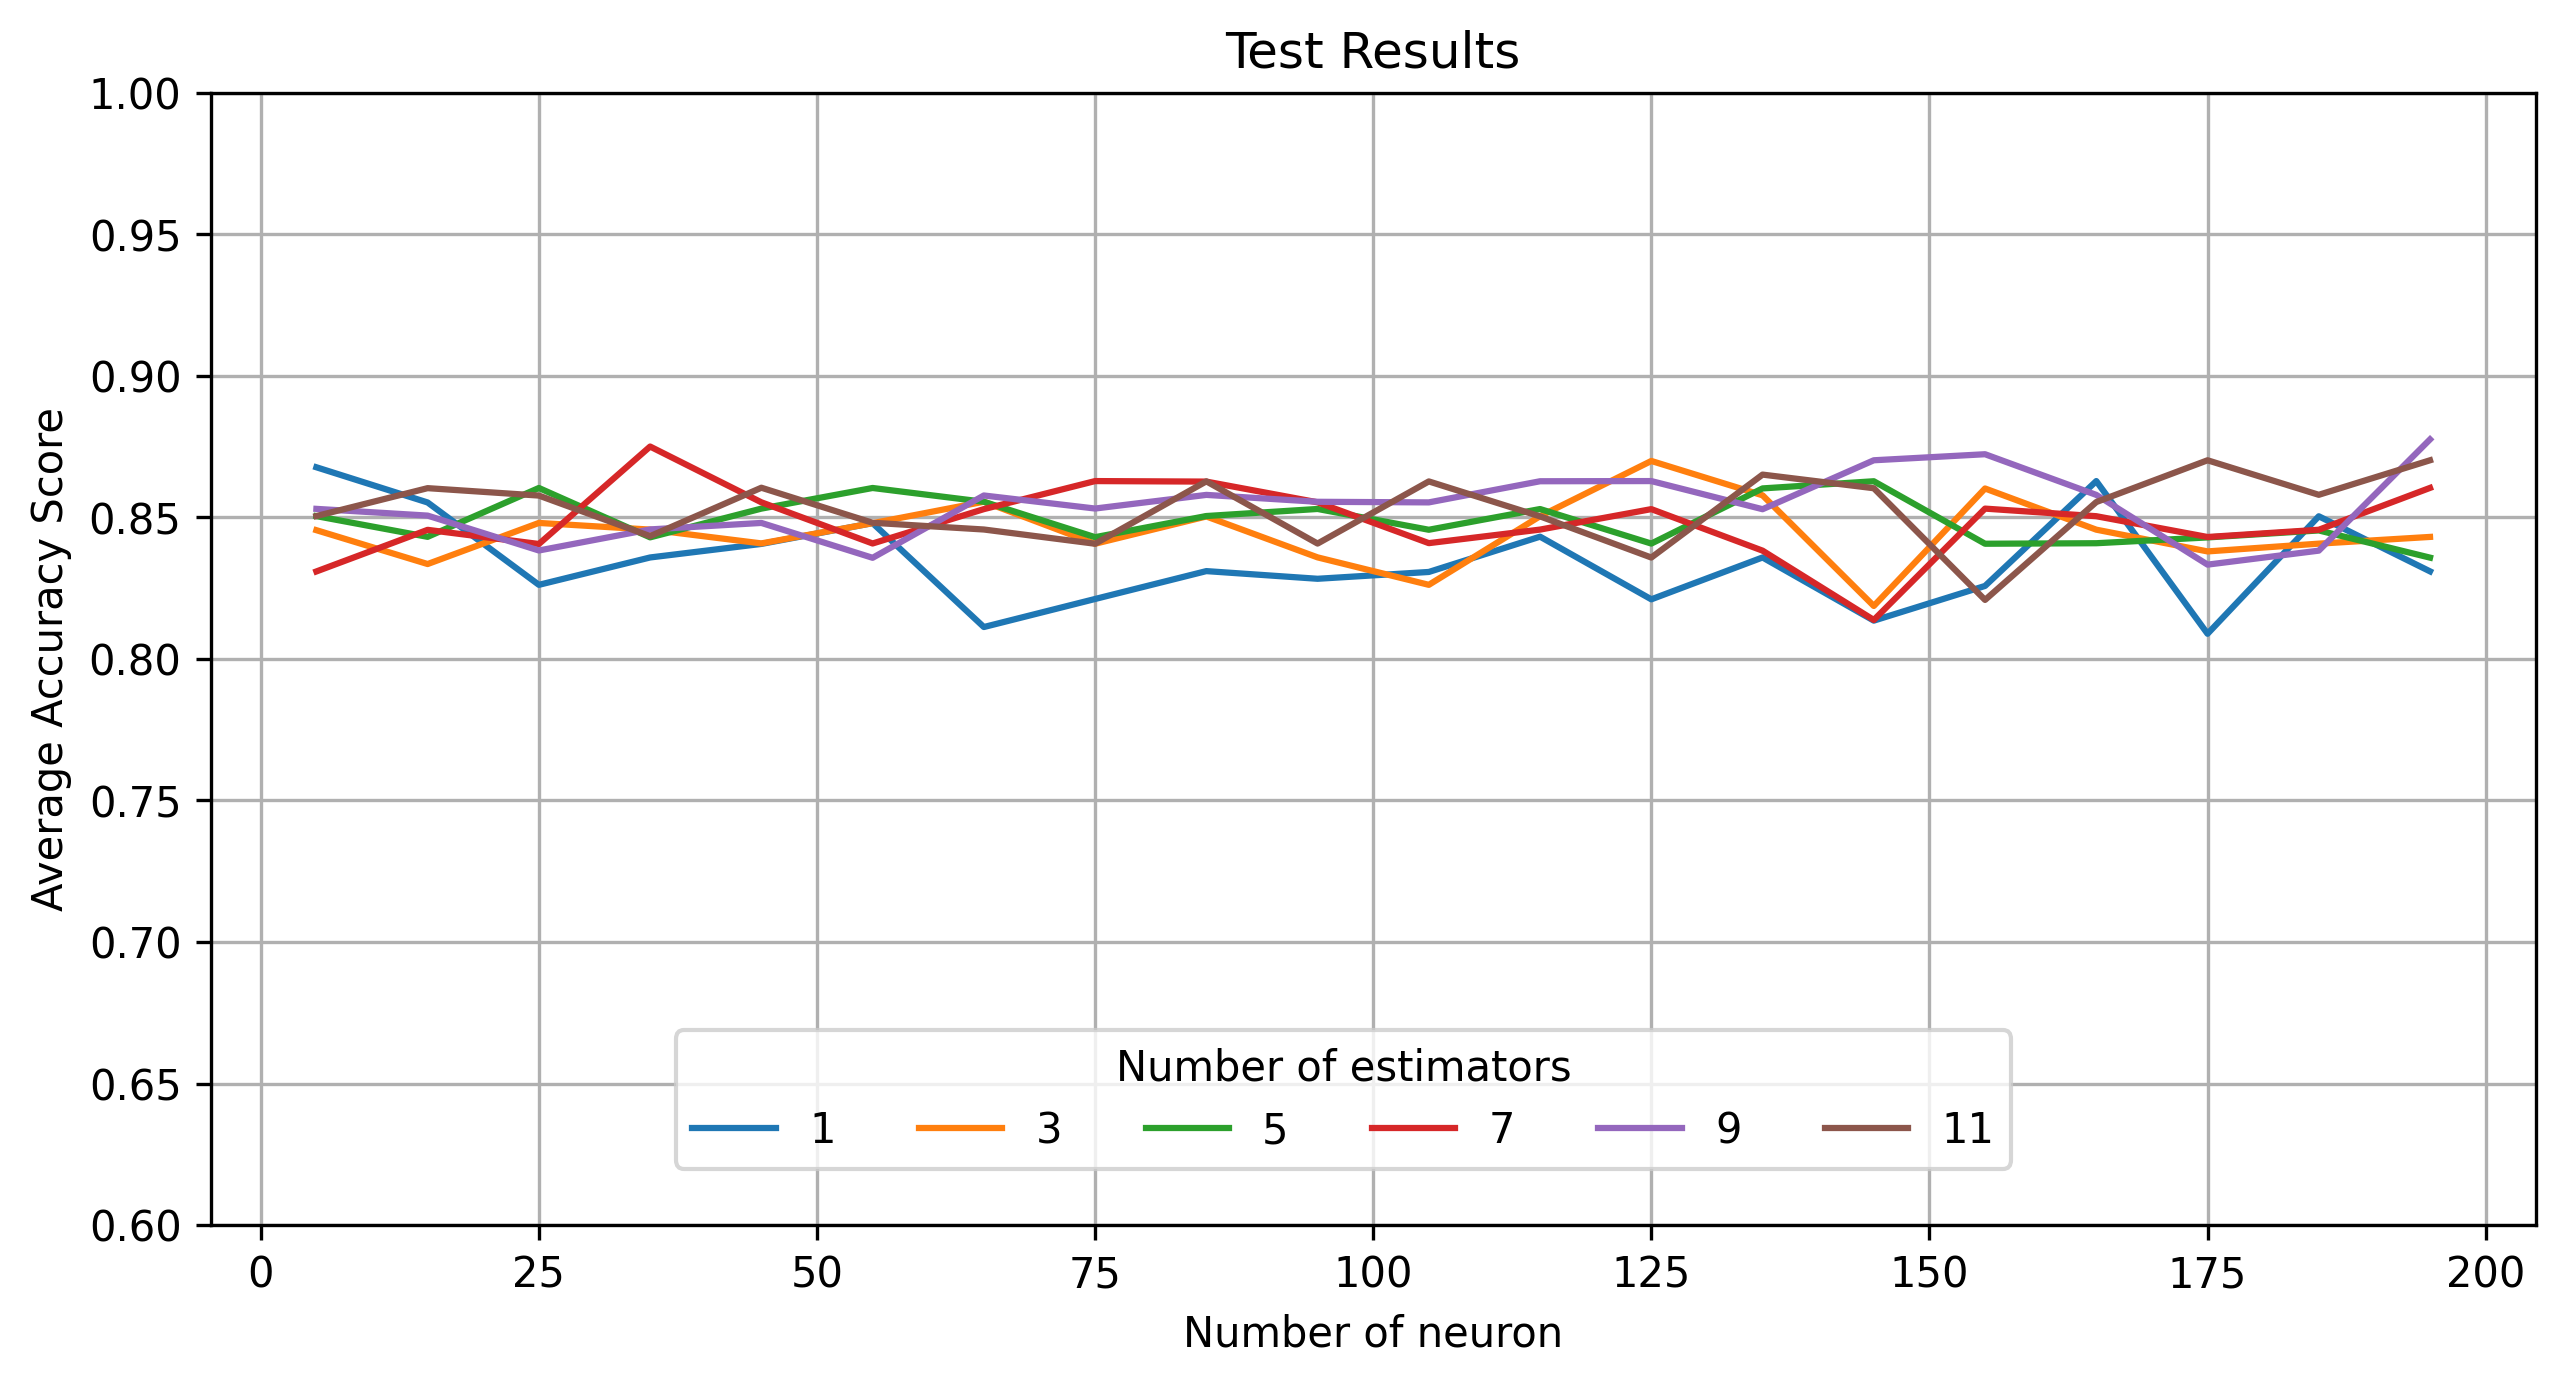

In [ ]:
# plt.figure(figsize=(10,5),dpi = 300)

# plt.ylim(bottom=0.6)
# plt.title("Test Results")
# plt.ylabel("Average Accuracy Score")
# plt.xlabel("Number of neuron")
# plt.grid()
# for n in range(1,13,2):
#     results_for_n_estimators = []
#     for l1 in range(5,201,10):
#         results_for_n_estimators.append(np.mean(results[n][l1]['Test Results']))
#     plt.plot(range(5,201,10),results_for_n_estimators,label = n)
    
    
    
# plt.legend(ncol= 6,loc = (0.2,0.05),title = "Number of estimators")
# plt.savefig("Test Results.jpg",bbox_inches = "tight")

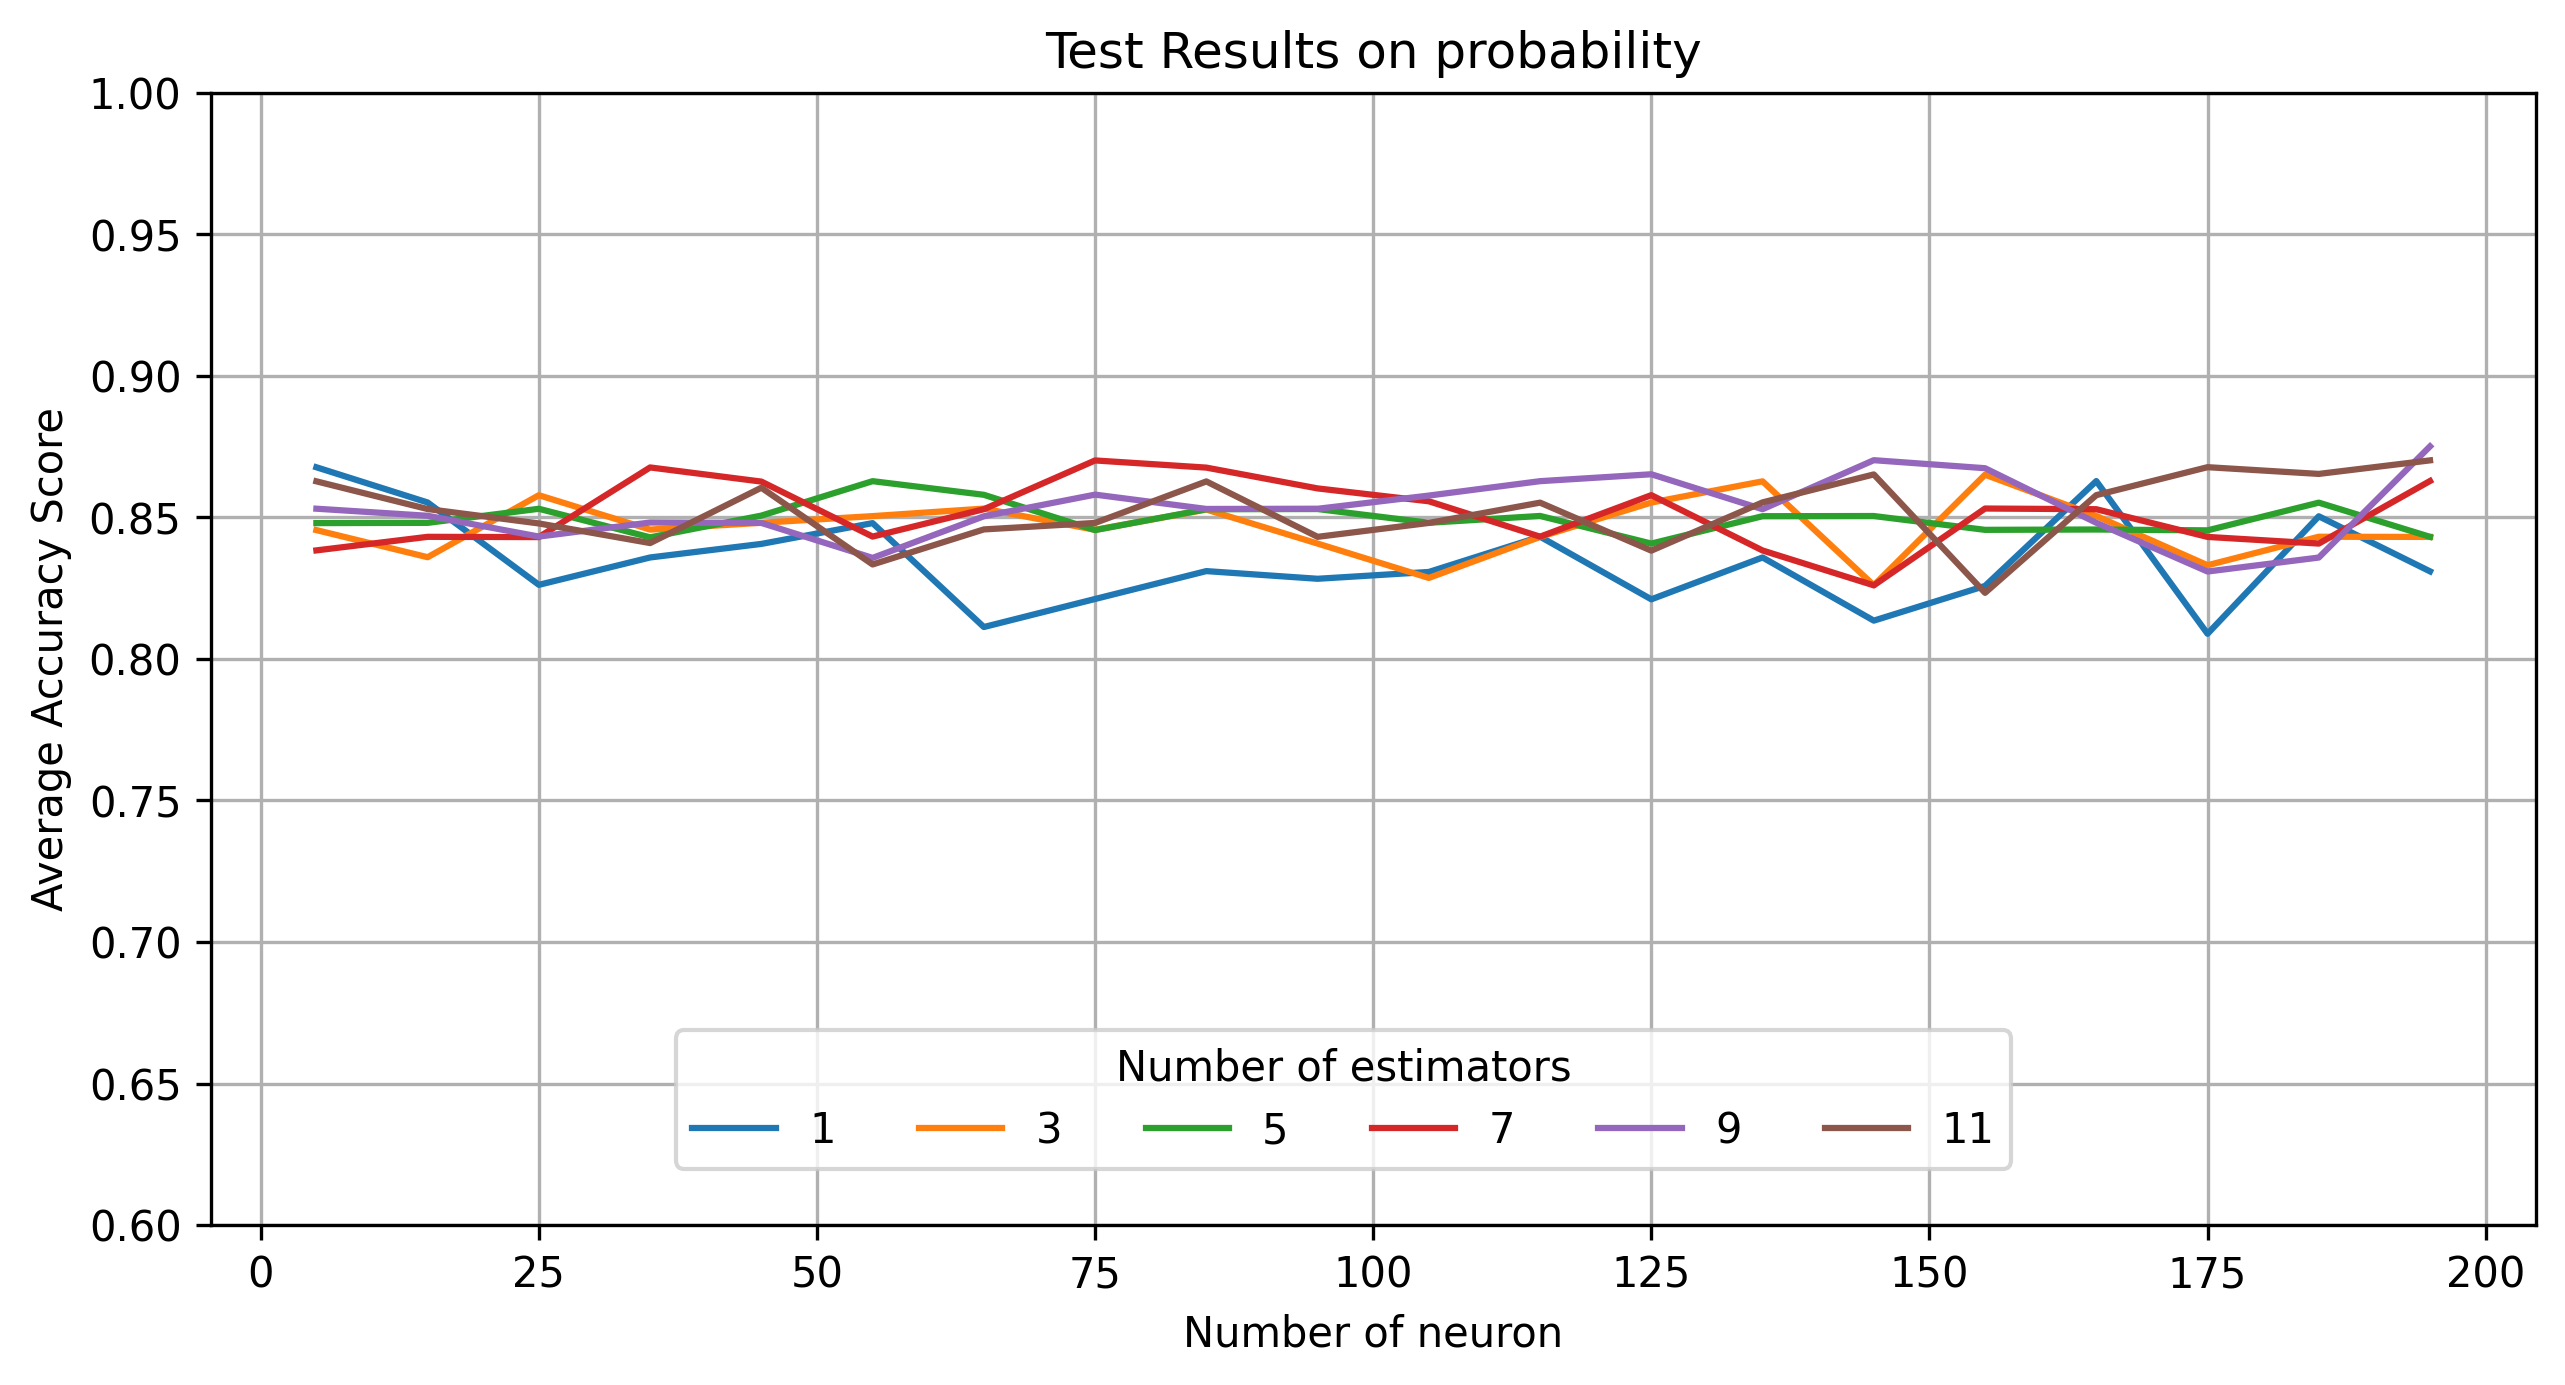

In [ ]:
# plt.figure(figsize=(10,5),dpi = 300)

# plt.ylim(bottom=0.6)
# plt.title("Test Results on probability")
# plt.ylabel("Average Accuracy Score")
# plt.xlabel("Number of neuron")
# plt.grid()
# for n in range(1,13,2):
#     results_for_n_estimators = []
#     for l1 in range(5,201,10):
#         results_for_n_estimators.append(np.mean(results[n][l1]['Test Results_on prob']))
#     plt.plot(range(5,201,10),results_for_n_estimators,label = n)
    
    
    
# plt.legend(ncol= 6,loc = (0.2,0.05),title = "Number of estimators")
# plt.savefig("Test Results_on prob.jpg",bbox_inches = "tight")

In [ ]:
# # load json module
# import json

# # create json object from dictionary
# json = json.dumps(results)

# # open file for writing, "w" 
# f = open("results.json","w")

# # write json object to file
# f.write(json)

# # close file
# f.close()

In [ ]:
# import json

# json = json.dumps(n_features_results)

# # open file for writing, "w" 
# f = open("nfeatures.json","w")

# # write json object to file
# f.write(json)

# # close file
# f.close()

In [ ]:
# import json


In [ ]:

# # Opening JSON file
# f = open('nfeatures.json')

# data = json.load(f)
 
# # Iterating through the json
# # list
# # for i in data['emp_details']:
    
# #     print(i)
    
# f.close()

In [ ]:
# data["60"]["TR"]

[0.7317073170731707,
 0.7560975609756098,
 0.8414634146341463,
 0.7654320987654321,
 0.7283950617283951]

In [ ]:
# data.pop("1310")

{}

In [ ]:
# lst_test

[0.6592893706714845,
 0.8112616681722372,
 0.8382414935260464,
 0.8773863294188498,
 0.8797952423968685,
 0.8749171936163807,
 0.8676904546823246,
 0.8774465522433001,
 0.8528455284552846,
 0.8626919602529359,
 0.8652213188798555,
 0.8137006925624812]

In [ ]:
lst_test=[]
lst_val=[]
lst_test_prob=[]
lst_val_prob =[]
for key in data:
    
    
    lst_test.append(np.mean(data[key]["TR"]))
    lst_val.append(np.mean(data[key]["VR"]))


    

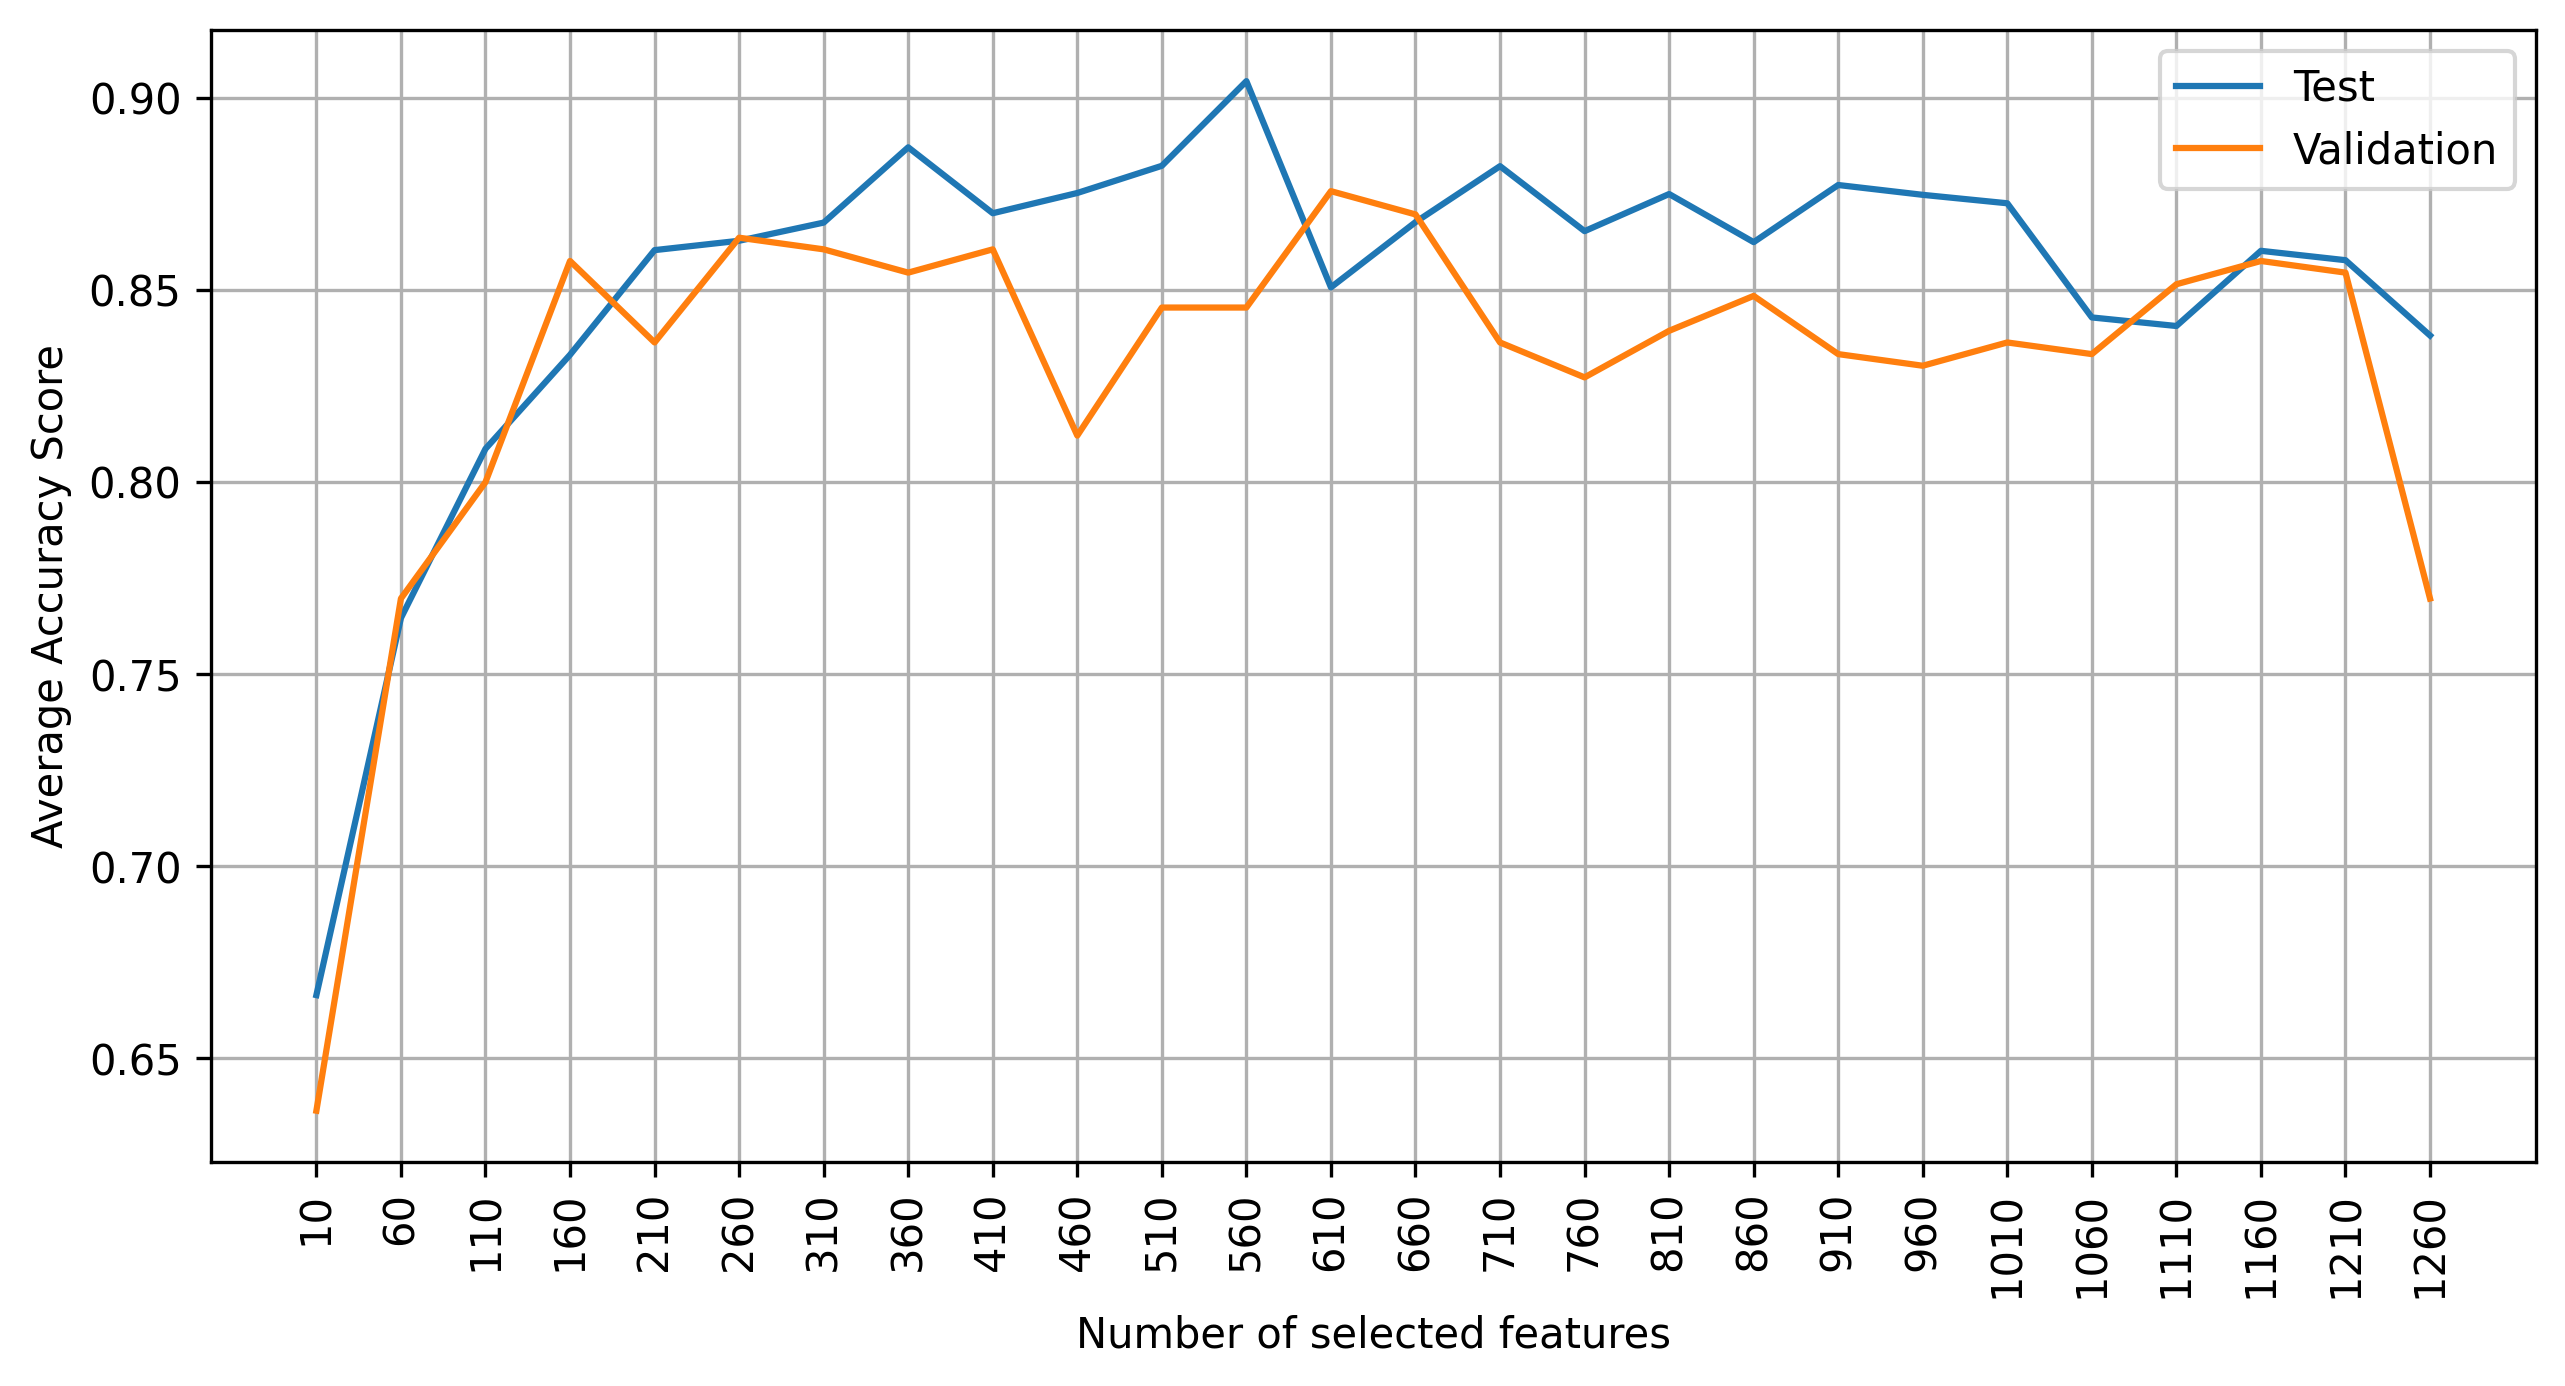

In [ ]:
# plt.figure(figsize=(10,5),dpi=300)
# plt.plot(data.keys(),lst_test,label= "Test")
# plt.plot(data.keys(),lst_val,label= "Validation")
# plt.xticks(rotation =90);
# plt.legend()
# plt.grid()
# plt.xlabel("Number of selected features")
# plt.ylabel("Average Accuracy Score");
# plt.savefig("selections_and_results_cutoff.jpg",bbox_inches = "tight")

In [ ]:
# set cut off to 410 features ^^^^^^^

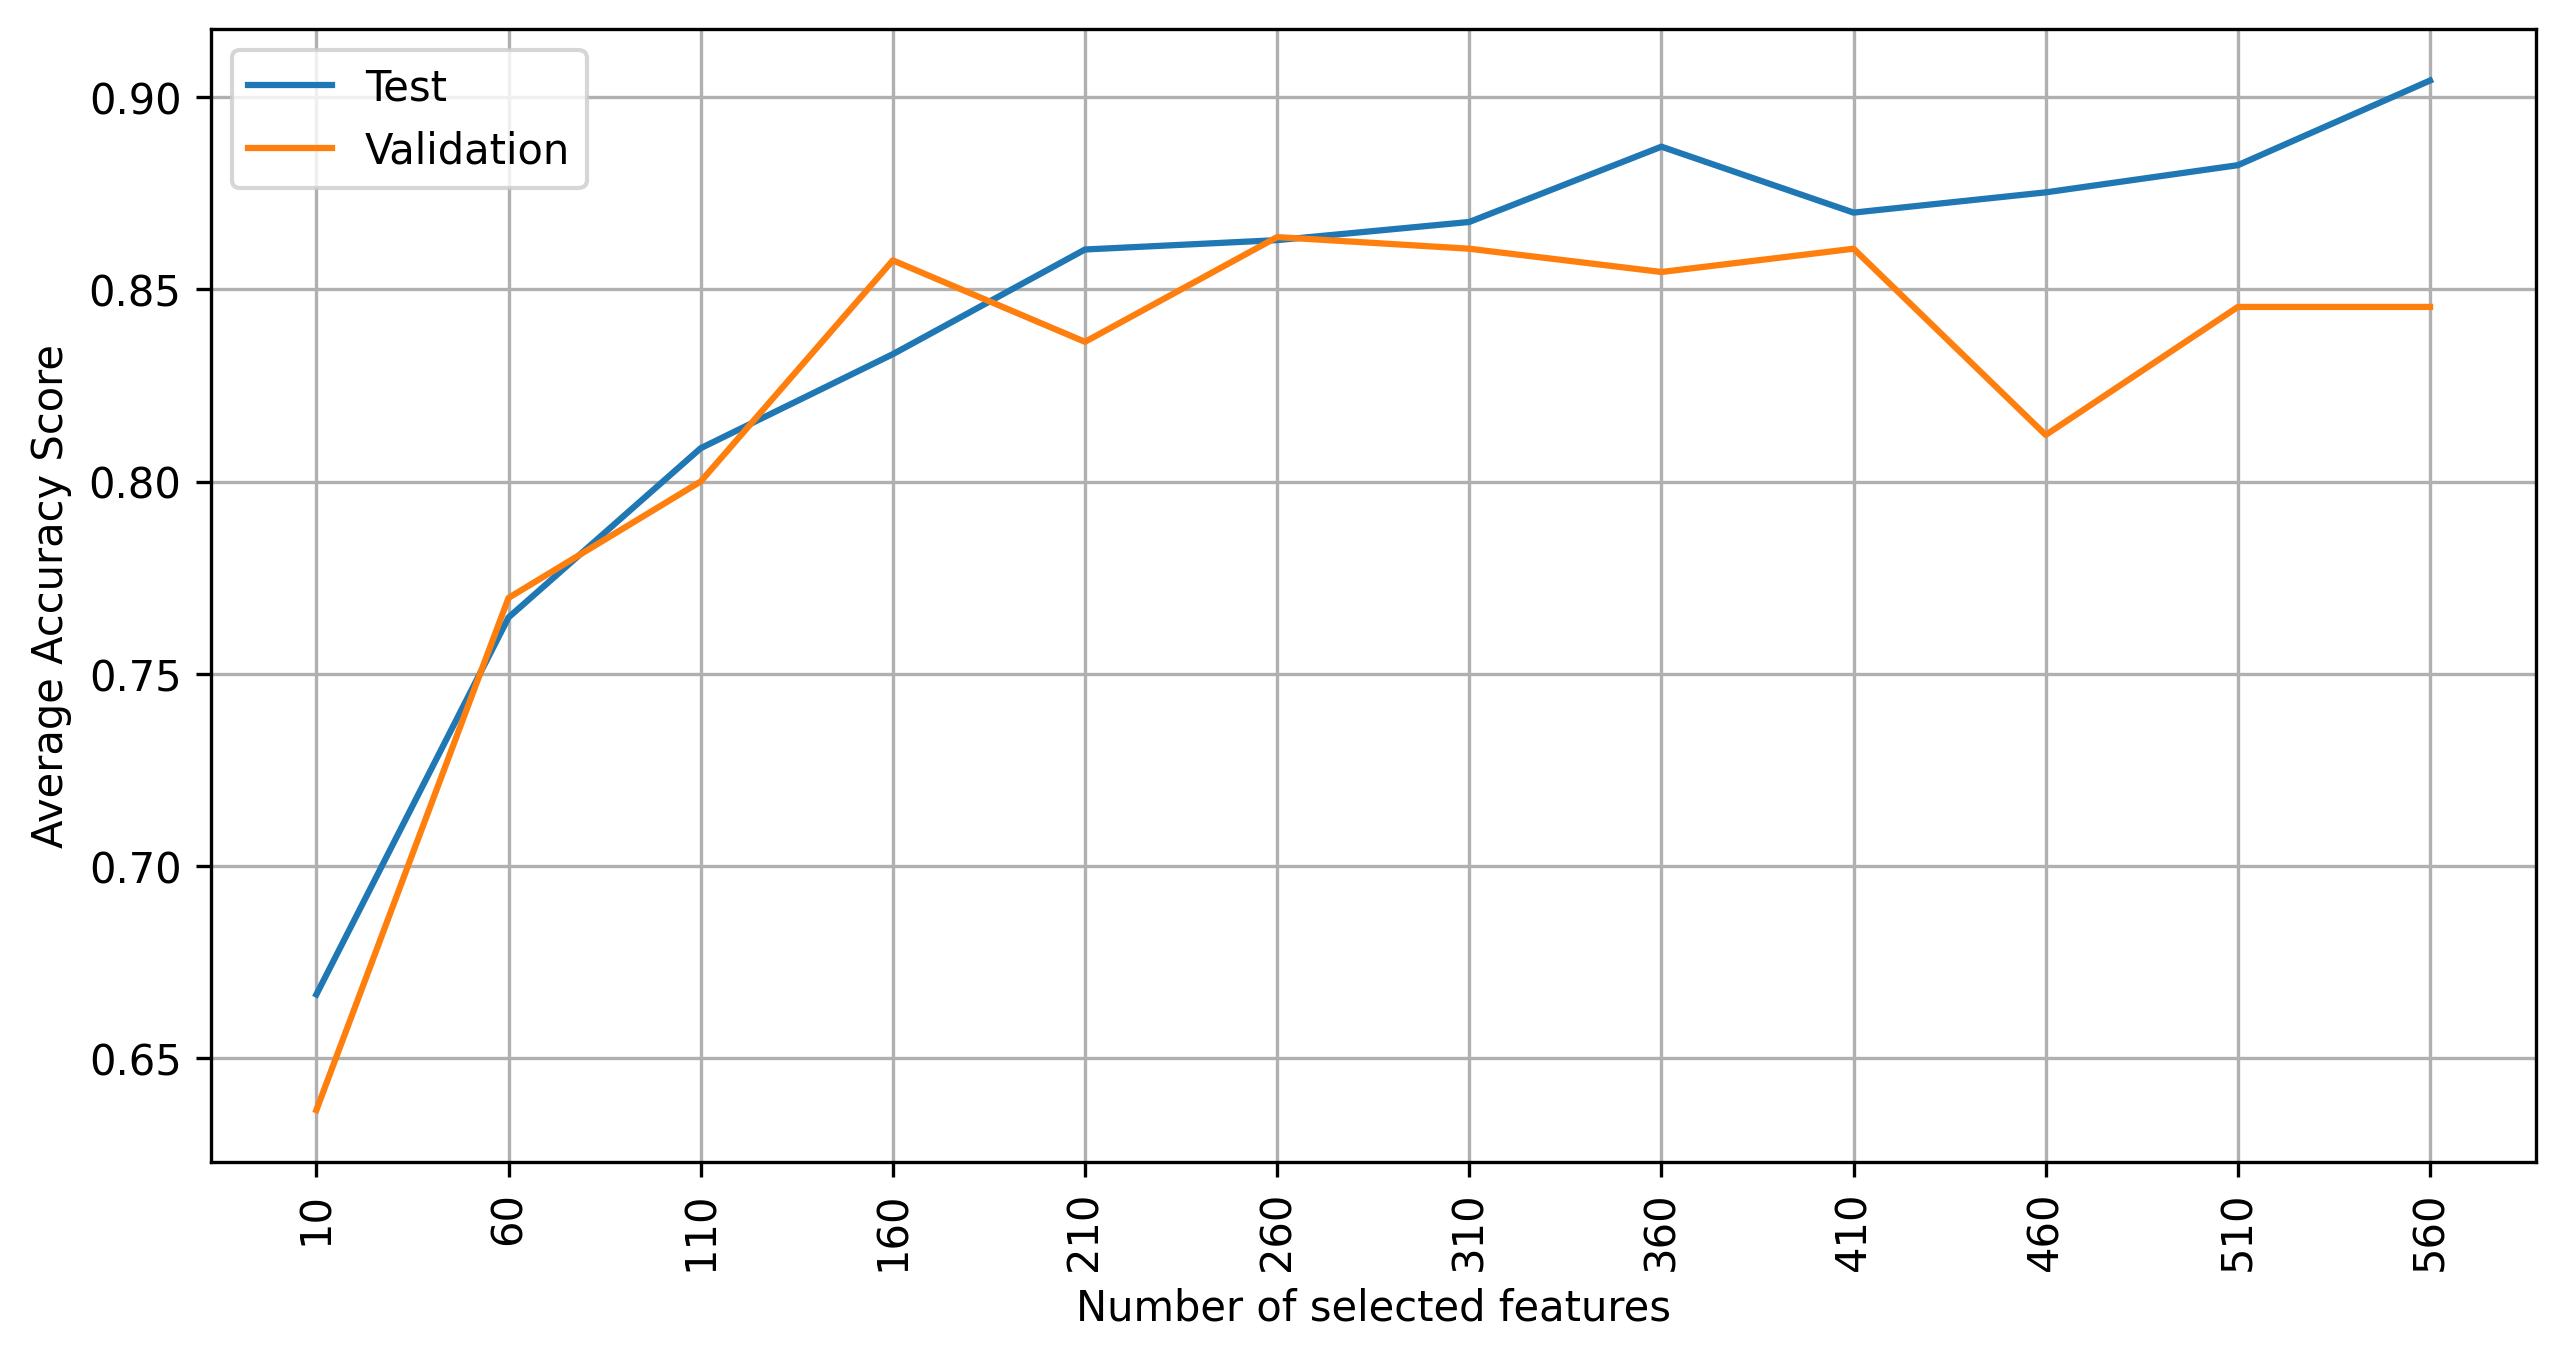

In [ ]:
# plt.figure(figsize=(10,5),dpi=300)
# plt.plot(list(data.keys())[:12],lst_test[:12],label= "Test")
# plt.plot(list(data.keys())[:12],lst_val[:12],label= "Validation")
# plt.xticks(rotation =90);
# plt.legend()
# plt.grid()
# plt.xlabel("Number of selected features")
# plt.ylabel("Average Accuracy Score");
# plt.savefig("selections_and_results2.jpg",bbox_inches = "tight")

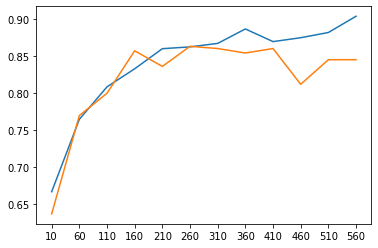

In [ ]:
# plt.plot(list(data.keys())[:12],lst_test[:12],label= "Test")
# plt.plot(list(data.keys())[:12],lst_val[:12],label= "Validation")

In [ ]:
# import json

In [ ]:
# pltoing for 2nd try data

In [ ]:

# Opening JSON file
f = open("n_features_selection_2nd_try.json")

data = json.load(f)
 
# Iterating through the json
# list
# for i in data['emp_details']:
    
#     print(i)
    
f.close()

In [ ]:
# lst_test=[]
# lst_val=[]
# lst_test_prob=[]
# lst_val_prob =[]
# for key in data:
    
    
#     lst_test.append(np.mean(data[key]["TR"]))
#     lst_val.append(np.mean(data[key]["VR"]))


    

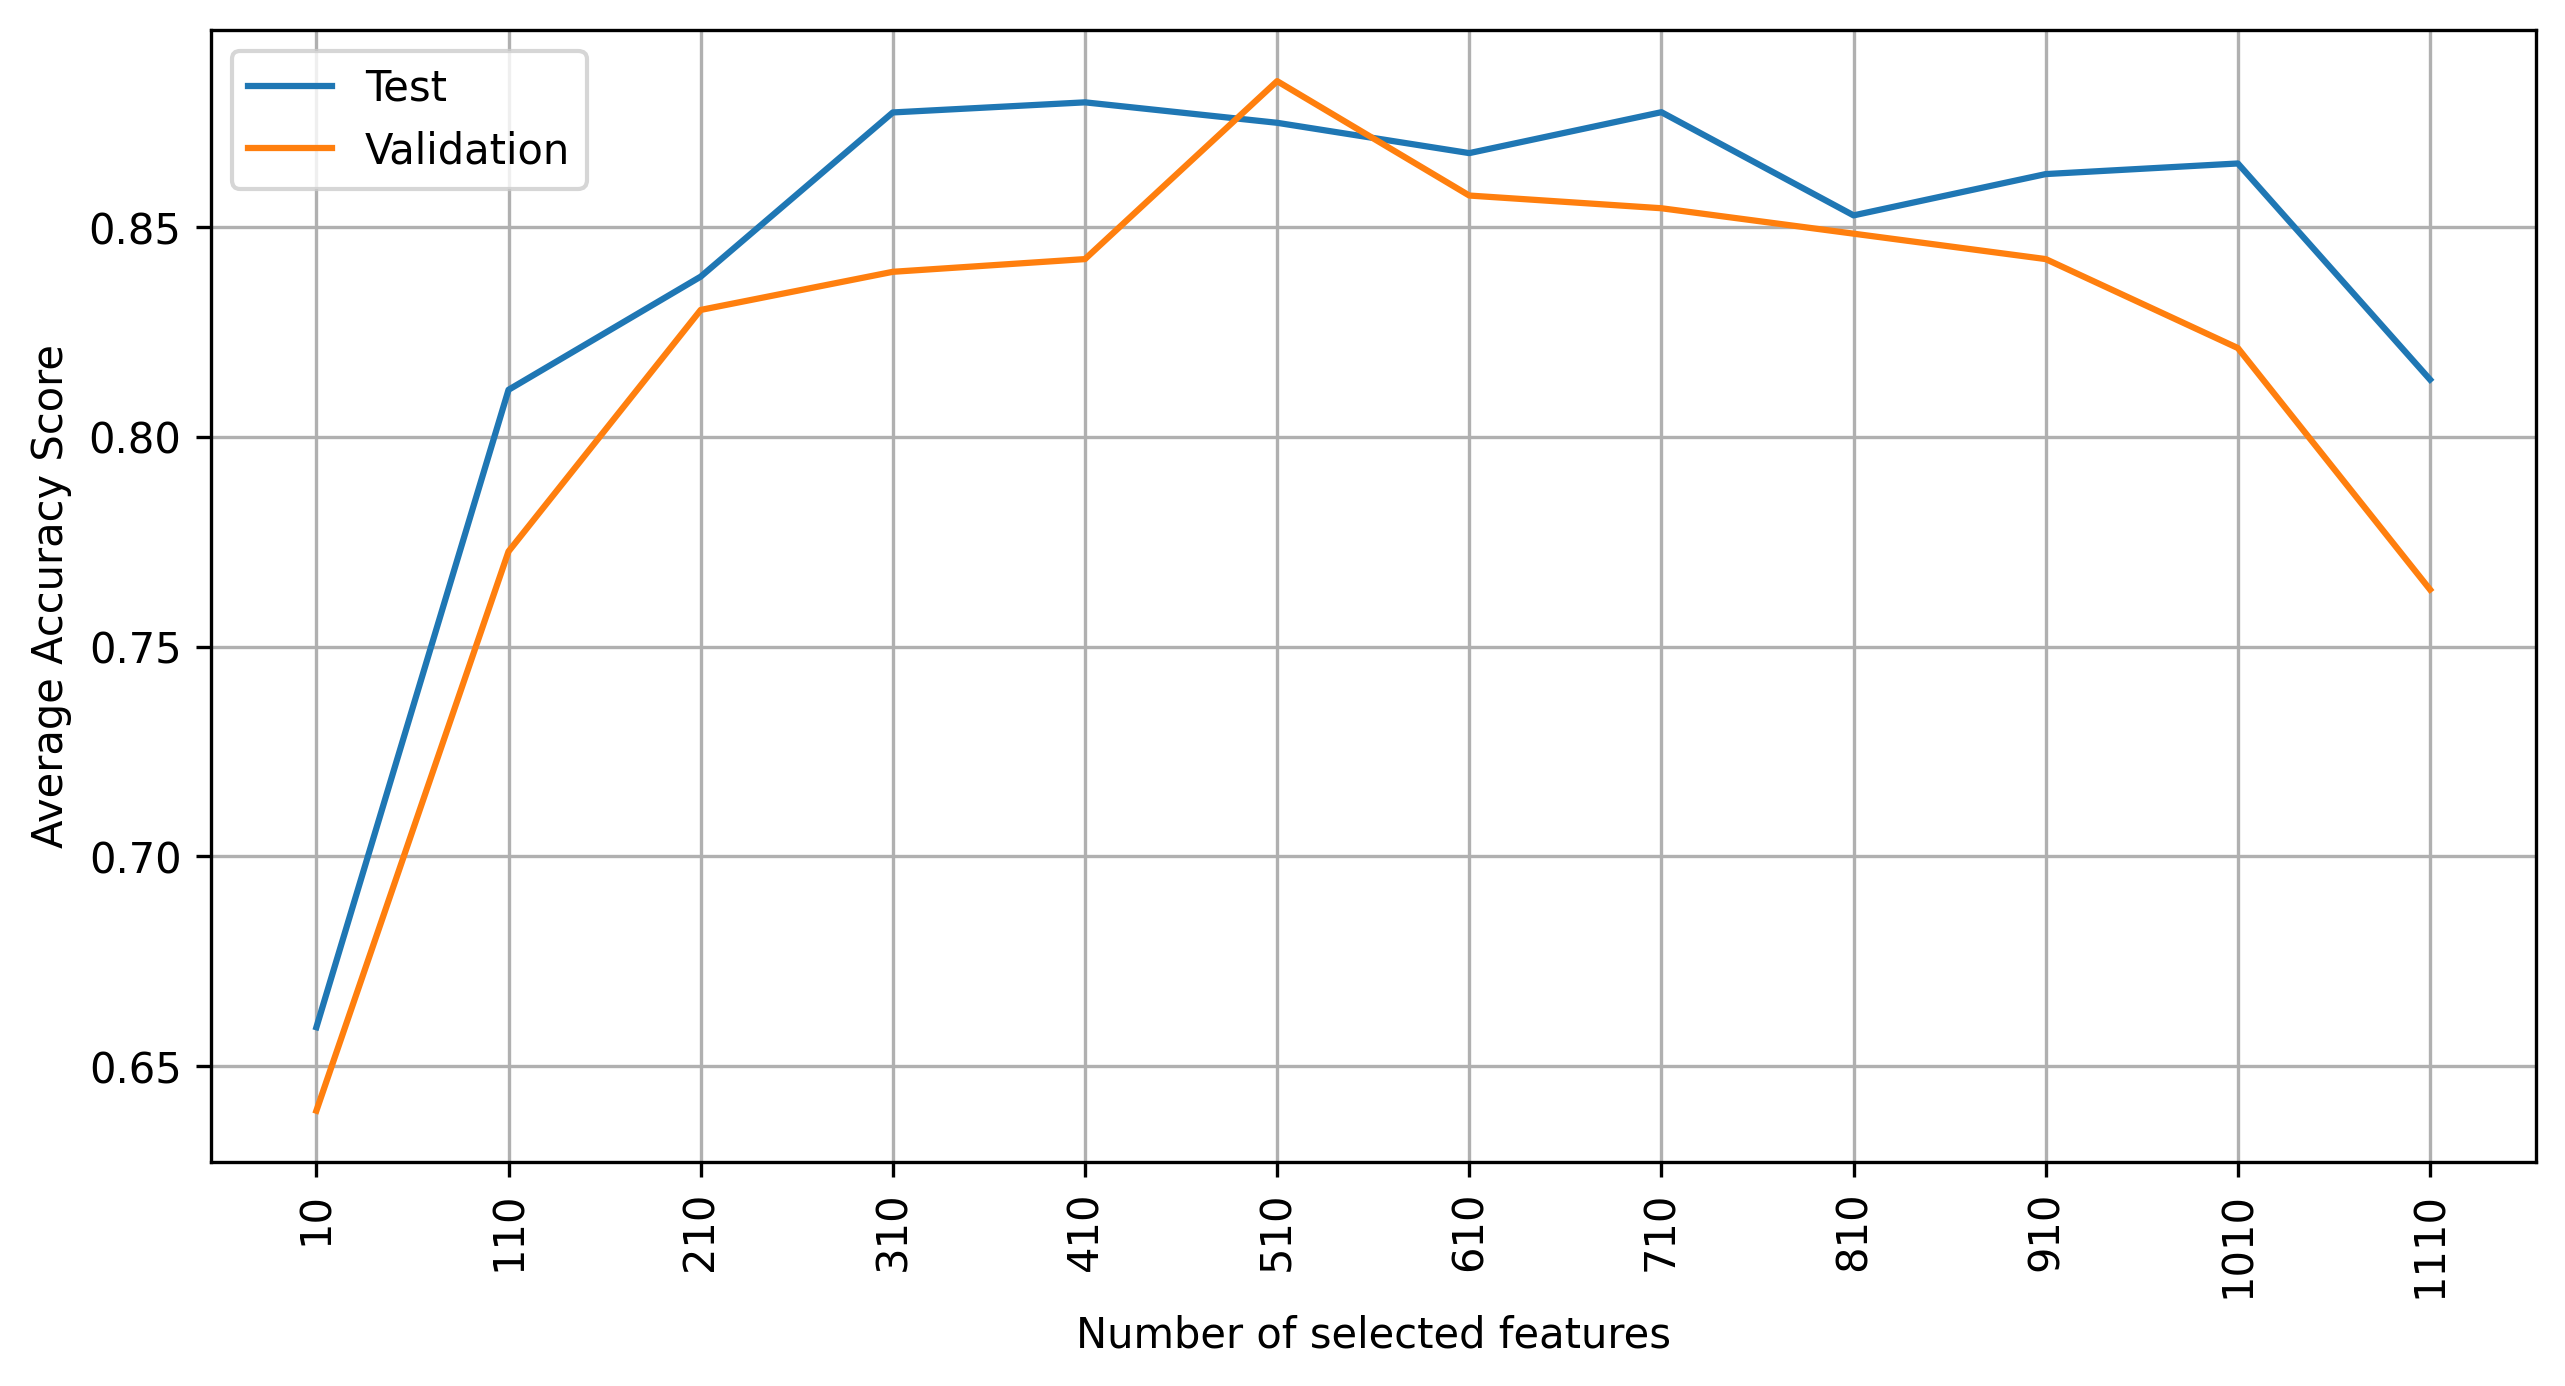

In [ ]:
# plt.figure(figsize=(10,5),dpi=300)
# plt.plot(data.keys(),lst_test,label= "Test")
# plt.plot(data.keys(),lst_val,label= "Validation")
# plt.xticks(rotation =90);
# plt.legend()
# plt.grid()
# plt.xlabel("Number of selected features")
# plt.ylabel("Average Accuracy Score");
# plt.savefig("selections_and_results3.jpg",bbox_inches = "tight")

In [ ]:
# deep_features

,0,1,2,3,4,5,6,7,8,9,...,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918
0,0.107583,7.425632,-9.367006,7.125009,-7.960252,-4.664871,-0.042266,1.648029,-3.639079,-0.768479,...,0.230497,-0.350974,-0.021939,-0.102468,-0.184175,0.184324,0.189902,-0.346620,0.106880,-0.346766
1,0.399553,10.840274,-9.639409,5.646807,-5.623012,-5.636859,-0.683149,1.515392,-3.414042,-1.274310,...,-0.066831,-0.252301,0.043782,-0.020022,-0.086701,-0.373512,0.192269,0.239861,0.163748,-0.249075
2,-11.978349,1.057783,-5.644924,-1.868119,-0.380978,4.747566,-0.077002,3.341278,-1.505592,1.140147,...,0.059026,-0.116184,-0.484369,-0.284789,-0.137245,-0.005062,-0.211253,0.208983,-0.054079,-0.157081
3,-2.045024,6.300500,-9.812500,1.906813,1.138107,-3.962615,-1.809154,2.889808,-1.115185,-3.015593,...,0.246933,0.066909,0.096461,-0.044182,0.197177,0.077478,-0.127807,-0.136037,-0.038396,-0.180787
4,-6.818208,3.271444,-9.661689,0.993333,-6.010099,0.861071,0.796504,1.432546,-4.816777,-2.336700,...,-0.454326,0.018774,0.847279,-0.234569,0.236324,-0.357639,0.170543,-0.166976,0.169705,-0.159752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0.882548,1.908581,12.188863,8.209162,-2.683608,-6.782961,7.879523,3.570526,-3.414354,3.488200,...,0.337715,0.020490,-0.094994,-0.025336,-0.023315,-0.105410,-0.099226,-0.222540,-0.050427,0.353831
404,28.560284,18.167778,12.267575,-10.071487,-8.486026,2.940641,6.123778,-4.014361,-2.079929,1.368259,...,0.448176,-0.128554,-0.213498,0.213374,-0.081752,-0.025493,0.037274,0.072300,0.254706,0.092576
405,31.217608,17.441852,14.803731,-9.685646,-9.575403,5.556466,4.040509,-2.819323,-1.378563,0.585035,...,-0.208226,0.698213,-0.163451,0.284477,0.029634,0.541717,-0.089803,0.138335,0.181417,0.635710
406,11.587239,-11.619829,-7.763899,0.678762,0.647791,1.873873,4.250558,-3.353131,-2.016608,-3.194266,...,0.427484,0.487308,0.022325,-0.215534,0.020436,-0.146254,-0.612534,-0.095593,-0.357637,0.318753


In [19]:
# Deep features with random forest
index = ranking1[:best_number_features]
data = deep_features[index]
results_randomfrst_510features = {}
for n in range(1,14,2):
    print(n)
    
    results_randomfrst_510features[n] = {}
    kf = KFold(n_splits=5,shuffle=True)
    count = 0
    lst_test = []
    lst_val = []
    lst_test_prob = []
    lst_val_prob = []
    # Iterating through each fold
    for train,test  in kf.split(data,all_labels):
        preds_test = pd.DataFrame()
        pred_val = pd.DataFrame()

        count+=1

        X = data.iloc[train]
        y = all_labels.iloc[train]
        X_test = data.iloc[test]
        y_test = all_labels.iloc[test] 
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
        pred_val_prob = np.zeros((len(y_validation),2),dtype=np.float32)
        pred_test_prob = np.zeros((y_test.shape[0],2),dtype=np.float32)
        for i in range(n):

        #     # Create model
            # model_knn = DecisionTreeClassifier()
            # model_knn = MLPClassifier((200,10),max_iter=200,early_stopping=True,solver="adam",learning_rate  = "adaptive",validation_fraction=0.2,n_iter_no_change=15)
            model_knn = RandomForestClassifier()
        #     # train model with training data
            model_knn.fit(X_train,y_train)

        #     # evaluating model with validation data
            pred_val = pd.concat([pred_val,(pd.DataFrame(data={"Knn" : model_knn.predict(X_validation)}))],axis=1)
            y_pred_val_prob= model_knn.predict_proba(X_validation)
            pred_val_prob+= y_pred_val_prob


            model_knn = RandomForestClassifier()
            # model_knn = DecisionTreeClassifier()
            model_knn.fit(X,y)

            preds_test = pd.concat([preds_test,(pd.DataFrame(model_knn.predict(X_test)))],axis=1)


            y_pred_test_prob= model_knn.predict_proba(X_test)
            pred_test_prob +=y_pred_test_prob
            # print(accuracy_score(y_test,preds_test))


        preds_test["sum"]= preds_test.transpose().apply(sum)

        preds_test["ensemble"] = preds_test["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

        pred_val["sum"]= pred_val.transpose().apply(sum)

        pred_val["ensemble"] = pred_val["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

        acc_test = accuracy_score(y_test,preds_test["ensemble"].to_numpy())
        acc_val = accuracy_score(y_validation,pred_val["ensemble"].to_numpy())

        lst_test.append(acc_test)
        lst_val.append(acc_val)

        pred_val_prob /=n
        pred_test_prob/=n
        # pred_val_prob.argmax(axis=-1)
        # pred_test_prob.argmax(axis=-1)
        p1 = [0 if n > 0.5 else 1 for n in pred_test_prob[:,0] ]
        p2 = [0 if n > 0.5 else 1 for n in pred_val_prob[:,0] ]

        # acc_test_prob = accuracy_score(y_test,pred_test_prob.argmax(axis=-1))
        # acc_val_prob = accuracy_score(y_validation,pred_val_prob.argmax(axis=-1))
        acc_test_prob = accuracy_score(y_test,p1)
        acc_val_prob = accuracy_score(y_validation,p2)

        lst_test_prob.append(acc_test_prob)
        lst_val_prob.append(acc_val_prob)
        results_randomfrst_510features[n]["Test Results"] = lst_test
        results_randomfrst_510features[n]["Test Results_on prob"] = lst_test_prob
        results_randomfrst_510features[n]["Validation Results"] = lst_val
        results_randomfrst_510features[n]["Validation Results_on prob"] = lst_val_prob



1
3
5
7
9
11
13


In [20]:
import json

json = json.dumps(results_randomfrst_510features)

# open file for writing, "w" 
f = open("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/results_randomfrst_510features.json","w")

# write json object to file
f.write(json)

# close file
f.close()

In [21]:
# Deep features with logistic regression
index = ranking1[:best_number_features]
data = deep_features[index]
results_log_510features = {}
for n in range(1,14,2):
    print(n)
    
    results_log_510features[n] = {}
    kf = KFold(n_splits=5,shuffle=True)
    count = 0
    lst_test = []
    lst_val = []
    lst_test_prob = []
    lst_val_prob = []
    # Iterating through each fold
    for train,test  in kf.split(data,all_labels):
        preds_test = pd.DataFrame()
        pred_val = pd.DataFrame()

        count+=1

        X = data.iloc[train]
        y = all_labels.iloc[train]
        X_test = data.iloc[test]
        y_test = all_labels.iloc[test] 
        X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)
        pred_val_prob = np.zeros((len(y_validation),2),dtype=np.float32)
        pred_test_prob = np.zeros((y_test.shape[0],2),dtype=np.float32)
        for i in range(n):

        #     # Create model
            # model_knn = DecisionTreeClassifier()
            # model_knn = MLPClassifier((200,10),max_iter=200,early_stopping=True,solver="adam",learning_rate  = "adaptive",validation_fraction=0.2,n_iter_no_change=15)
            model_knn = LogisticRegression(max_iter=10000)
        #     # train model with training data
            model_knn.fit(X_train,y_train)

        #     # evaluating model with validation data
            pred_val = pd.concat([pred_val,(pd.DataFrame(data={"Knn" : model_knn.predict(X_validation)}))],axis=1)
            y_pred_val_prob= model_knn.predict_proba(X_validation)
            pred_val_prob+= y_pred_val_prob


            model_knn = LogisticRegression(max_iter=10000)
            # model_knn = DecisionTreeClassifier()
            model_knn.fit(X,y)

            preds_test = pd.concat([preds_test,(pd.DataFrame(model_knn.predict(X_test)))],axis=1)


            y_pred_test_prob= model_knn.predict_proba(X_test)
            pred_test_prob +=y_pred_test_prob
            # print(accuracy_score(y_test,preds_test))


        preds_test["sum"]= preds_test.transpose().apply(sum)

        preds_test["ensemble"] = preds_test["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

        pred_val["sum"]= pred_val.transpose().apply(sum)

        pred_val["ensemble"] = pred_val["sum"].apply(lambda x: 0 if x<(n//2+1) else 1)

        acc_test = accuracy_score(y_test,preds_test["ensemble"].to_numpy())
        acc_val = accuracy_score(y_validation,pred_val["ensemble"].to_numpy())

        lst_test.append(acc_test)
        lst_val.append(acc_val)

        pred_val_prob /=n
        pred_test_prob/=n
        # pred_val_prob.argmax(axis=-1)
        # pred_test_prob.argmax(axis=-1)
        p1 = [0 if n > 0.5 else 1 for n in pred_test_prob[:,0] ]
        p2 = [0 if n > 0.5 else 1 for n in pred_val_prob[:,0] ]

        # acc_test_prob = accuracy_score(y_test,pred_test_prob.argmax(axis=-1))
        # acc_val_prob = accuracy_score(y_validation,pred_val_prob.argmax(axis=-1))
        acc_test_prob = accuracy_score(y_test,p1)
        acc_val_prob = accuracy_score(y_validation,p2)

        lst_test_prob.append(acc_test_prob)
        lst_val_prob.append(acc_val_prob)
        results_log_510features[n]["Test Results"] = lst_test
        results_log_510features[n]["Test Results_on prob"] = lst_test_prob
        results_log_510features[n]["Validation Results"] = lst_val
        results_log_510features[n]["Validation Results_on prob"] = lst_val_prob



1
3
5
7
9
11
13


In [22]:
import json

json = json.dumps(results_log_510features)

# open file for writing, "w" 
f = open("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/results_log_510features.json","w")

# write json object to file
f.write(json)

# close file
f.close()

In [ ]:
# res = pd.DataFrame()
# for key in results_log_510features:
#     res = pd.concat([res,pd.DataFrame(results_log_510features[key])],axis=0)
# res.reset_index(inplace=True)
# res.drop("index",axis=1,inplace=True)

# number_of_estimators = pd.DataFrame(data = {"Number of estimators":np.repeat(range(1,14,2),5)})

# res = pd.concat([(number_of_estimators),res],axis=1)

# res.groupby("Number of estimators").mean().to_excel("Logistic_ensemble_results_avg.xlsx")

# res.to_excel("Logistic_ensemble_results.xlsx",index=False)

In [ ]:
# res = pd.DataFrame()
# for key in results_randomfrst_510features:
#     res = pd.concat([res,pd.DataFrame(results_randomfrst_510features[key])],axis=0)
# res.reset_index(inplace=True)
# res.drop("index",axis=1,inplace=True)

# number_of_estimators = pd.DataFrame(data = {"Number of estimators":np.repeat(range(1,14,2),5)})

# res = pd.concat([(number_of_estimators),res],axis=1)

# res.groupby("Number of estimators").mean().to_excel("Random_forest_ensemble_results_avg.xlsx")

# res.to_excel("Random_forest_ensemble_results.xlsx",index=False)

In [23]:
# Getting best results for mlp
lst_neurons_estimators_vr = []
for key1 in results.keys():
  for key2 in results[key1].keys():
    lst_neurons_estimators_vr.append((key1,key2,np.mean(results[key1][key2]["Validation Results"])))
est_mlp,neurons,*others = max(lst_neurons_estimators_vr , key = lambda x:x[2])

In [24]:

# Getting best results for Random Forest
lst_estimators_vr_rf = []
for key1 in results_randomfrst_510features.keys():
  lst_estimators_vr_rf.append((key1,np.mean(results_randomfrst_510features[key1]["Validation Results"])))
est_rf ,acc = max(lst_estimators_vr_rf,key = lambda x:x[1])

In [25]:
# Getting best results for Logistic Regression
lst_estimators_vr_lr = []
for key1 in results_log_510features.keys():
  lst_estimators_vr_lr.append((key1,np.mean(results_log_510features[key1]["Validation Results"])))
est_lr ,acc = max(lst_estimators_vr_lr,key = lambda x:x[1])

In [ ]:
results_log_510features[est_lr]

{'Test Results': [0.8048780487804879,
  0.7926829268292683,
  0.7804878048780488,
  0.8271604938271605,
  0.8518518518518519],
 'Test Results_on prob': [0.8048780487804879,
  0.7926829268292683,
  0.7804878048780488,
  0.8271604938271605,
  0.8518518518518519],
 'Validation Results': [0.8484848484848485,
  0.8636363636363636,
  0.8181818181818182,
  0.7575757575757576,
  0.8333333333333334],
 'Validation Results_on prob': [0.8484848484848485,
  0.8636363636363636,
  0.8181818181818182,
  0.7575757575757576,
  0.8333333333333334]}

In [26]:
best_results_for_combined = pd.DataFrame(data = {"data": ["Combined"]*5,"model" : ["MLP"]*5,"Test Results":results[est_mlp][neurons]["Test Results"],"Validation Results":results[est_mlp][neurons]["Validation Results"] })

In [27]:
best_results_for_combined = pd.concat([best_results_for_combined,pd.DataFrame(data = {"data": ["Combined"]*5,"model" : ["Logistic Regression"]*5,"Test Results":results_log_510features[est_lr]["Test Results"],"Validation Results":results_log_510features[est_lr]["Validation Results"] })],axis=0)

In [28]:
best_results_for_combined = pd.concat([best_results_for_combined,pd.DataFrame(data = {"data": ["Combined"]*5,"model" : ["Random Forest"]*5,"Test Results":results_randomfrst_510features[est_rf]["Test Results"],"Validation Results":results_randomfrst_510features[est_rf]["Validation Results"] })],axis=0)

In [29]:
best_results_for_combined.to_excel("/content/drive/MyDrive/Tecvico Files/projects/Copy of P202203140002/Code and dataset/Version 1/Deep Features/best_results_for_combined.xlsx",index = False)